#Preparando el entorno de trabajo

In [1176]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1177]:
# Cálculo del tiempo de duración de alguno de los procesos
import time

# Operaciones numéricas y matriciales
import numpy as np
import pandas as pd

# Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import plotly.express as px

# Librerías básicas de python para ciencia de datos y machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

# Objetivos

Clustering de los equipos:

- Según los cuatro factores de Oliver.
- Analizar y caracterizar los clusters resultantes.
- Conclusiones sobre la idoneidad de los cuatro factores de Oliver para agrupar los resultados de los equipos



#Equipos LEB Oro 2018/2019

In [1178]:
# Base de datos de la temporada 2018/2019
Equipos = pd.read_csv("/content/drive/MyDrive/DS BALONCESTO/TEAM CLUSTERING/LEB ORO 18 19/tORO2018J1J34-1Pl.csv")

In [1179]:
Equipos.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Nombre,b'BARCA LASSA' Against,b'BARCA LASSA' Team,b'C.B. PRAT' Against,b'C.B. PRAT' Team,b'CACERES PATRIMONIO DE LA HUMANIDAD' Against,b'CACERES PATRIMONIO DE LA HUMANIDAD' Team,b'CARRAMIMBRE CBC VALLADOLID' Against,b'CARRAMIMBRE CBC VALLADOLID' Team,b'CHOCOLATES TRAPA PALENCIA' Against,b'CHOCOLATES TRAPA PALENCIA' Team,...,b'RETABET BILBAO BASKET' Against,b'RETABET BILBAO BASKET' Team,b'RIO OURENSE TERMAL' Against,b'RIO OURENSE TERMAL' Team,b'SAENZ HORECA ARABERRI' Against,b'SAENZ HORECA ARABERRI' Team,b'TAU CASTELLO' Against,b'TAU CASTELLO' Team,b'ZTE REAL CANOE N.C.' Against,b'ZTE REAL CANOE N.C.' Team
Condicion,['Media Rival'],['Media'],['Media Rival'],['Media'],['Media Rival'],['Media'],['Media Rival'],['Media'],['Media Rival'],['Media'],...,['Media Rival'],['Media'],['Media Rival'],['Media'],['Media Rival'],['Media'],['Media Rival'],['Media'],['Media Rival'],['Media']
Partidos,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
Minutos,200.44,202.21,201.81,202.21,201.84,202.21,201.41,202.21,202.52,202.94,...,201.16,201.47,198.81,200.0,199.44,200.74,200.74,184.85,201.22,202.21
Puntos,73.79,70.12,80.0,71.18,75.38,70.24,74.35,78.18,78.91,78.91,...,69.21,77.24,70.76,74.35,81.85,74.0,77.79,69.88,77.5,68.26
T2 Anotados,20.09,17.12,20.5,18.32,20.0,17.41,17.85,21.35,20.44,22.65,...,17.35,20.38,19.12,19.03,20.88,20.26,19.76,18.26,21.62,19.32
T2 Lanzados,40.85,35.85,37.56,38.82,38.44,36.53,36.32,43.91,38.74,44.68,...,36.59,37.62,38.03,38.97,39.53,41.71,40.15,36.59,40.88,41.47
% T2,0.491721,0.477441,0.54581,0.47197,0.520275,0.476651,0.491498,0.486269,0.527715,0.506912,...,0.474277,0.54183,0.502707,0.488302,0.528274,0.485896,0.492308,0.499196,0.528777,0.465957
T3 Anotados,7.15,8.56,8.74,7.74,8.21,8.44,8.41,7.35,8.47,6.79,...,7.44,8.5,7.97,7.88,9.79,7.59,9.32,7.59,7.62,6.29
T3 Lanzados,21.18,27.85,24.91,24.44,24.62,24.44,24.82,21.59,25.5,19.62,...,22.59,27.5,24.35,22.15,26.79,25.09,25.29,22.68,22.94,21.59


In [1180]:
Equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre             36 non-null     object 
 1   Condicion          36 non-null     object 
 2   Partidos           36 non-null     float64
 3   Minutos            36 non-null     float64
 4   Puntos             36 non-null     float64
 5   T2 Anotados        36 non-null     float64
 6   T2 Lanzados        36 non-null     float64
 7   % T2               36 non-null     float64
 8   T3 Anotados        36 non-null     float64
 9   T3 Lanzados        36 non-null     float64
 10  % T3               36 non-null     float64
 11  T1 Anotados        36 non-null     float64
 12  T1 Lanzados        36 non-null     float64
 13  % T1               36 non-null     float64
 14  Reb. Ofensivos     36 non-null     float64
 15  Reb. Defensivos    36 non-null     float64
 16  Rebotes            36 non-nu

In [1181]:
Equipos.columns

Index(['Nombre', 'Condicion', 'Partidos', 'Minutos', 'Puntos', 'T2 Anotados',
       'T2 Lanzados', '% T2', 'T3 Anotados', 'T3 Lanzados', '% T3',
       'T1 Anotados', 'T1 Lanzados', '% T1', 'Reb. Ofensivos',
       'Reb. Defensivos', 'Rebotes', 'Asistencias', 'Robos', 'Perdidas',
       'Tapones', 'Tapones Recibidos', 'Mates', 'Faltas Cometidas',
       'Faltas Recibidas', 'Valoracion', 'Posesiones', 'Ritmo', 'OER',
       '% TC Efectivo', '% Jugada', 'Frec. TL', '% Reb Def', '% Reb Of',
       '% Assis', '% Perd'],
      dtype='object')

#Preparación y tratamiento del dataset

In [1182]:
#Editar columna nombre equipos
Equipos["Equipo"] = Equipos["Nombre"]

In [1183]:
Equipos.drop("Nombre", axis = 1, inplace = True)

In [1184]:
Equipos = Equipos[ ['Equipo'] + [ col for col in Equipos.columns if col != 'Equipo']]

In [1185]:
Equipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Equipo             36 non-null     object 
 1   Condicion          36 non-null     object 
 2   Partidos           36 non-null     float64
 3   Minutos            36 non-null     float64
 4   Puntos             36 non-null     float64
 5   T2 Anotados        36 non-null     float64
 6   T2 Lanzados        36 non-null     float64
 7   % T2               36 non-null     float64
 8   T3 Anotados        36 non-null     float64
 9   T3 Lanzados        36 non-null     float64
 10  % T3               36 non-null     float64
 11  T1 Anotados        36 non-null     float64
 12  T1 Lanzados        36 non-null     float64
 13  % T1               36 non-null     float64
 14  Reb. Ofensivos     36 non-null     float64
 15  Reb. Defensivos    36 non-null     float64
 16  Rebotes            36 non-nu

In [1186]:
Equipos.isnull().sum()

Equipo               0
Condicion            0
Partidos             0
Minutos              0
Puntos               0
T2 Anotados          0
T2 Lanzados          0
% T2                 0
T3 Anotados          0
T3 Lanzados          0
% T3                 0
T1 Anotados          0
T1 Lanzados          0
% T1                 0
Reb. Ofensivos       0
Reb. Defensivos      0
Rebotes              0
Asistencias          0
Robos                0
Perdidas             0
Tapones              0
Tapones Recibidos    0
Mates                0
Faltas Cometidas     0
Faltas Recibidas     0
Valoracion           0
Posesiones           0
Ritmo                0
OER                  0
% TC Efectivo        0
% Jugada             0
Frec. TL             0
% Reb Def            0
% Reb Of             0
% Assis              0
% Perd               0
dtype: int64

In [1187]:
Equipos.head(2)

,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,b'BARCA LASSA' Against,['Media Rival'],34.0,200.44,73.79,20.09,40.85,0.491721,7.15,21.18,...,70.97,0.497013,103.978450,49.668089,40.33017,19.630156,70.456503,31.945701,14.264695,16.951990
1,b'BARCA LASSA' Team,['Media'],34.0,202.21,70.12,17.12,35.85,0.477441,8.56,27.85,...,71.82,0.502987,97.624898,47.022161,36.83723,16.020314,68.054299,29.543497,14.256184,17.215341


In [1188]:
Equipos['Condicion'] = Equipos['Condicion'].replace(["['Media Rival']"], "Rival")

In [1189]:
Equipos['Condicion'] = Equipos['Condicion'].replace(["['Media']"], "Propio")

In [1190]:
Equipos['Condicion'].replace(['["Media Rival"]', '["Media"]'], ['Rival', "Propio"])

0      Rival
1     Propio
2      Rival
3     Propio
4      Rival
5     Propio
6      Rival
7     Propio
8      Rival
9     Propio
10     Rival
11    Propio
12     Rival
13    Propio
14     Rival
15    Propio
16     Rival
17    Propio
18     Rival
19    Propio
20     Rival
21    Propio
22     Rival
23    Propio
24     Rival
25    Propio
26     Rival
27    Propio
28     Rival
29    Propio
30     Rival
31    Propio
32     Rival
33    Propio
34     Rival
35    Propio
Name: Condicion, dtype: object

In [1191]:
#Editar valores en columna Equipo
Equipos['Equipo'] = Equipos['Equipo'] .apply(lambda x: x.replace("b'","").replace("'",""))

In [1192]:
#Editar valores en columna Equipo
Equipos['Equipo'] = Equipos['Equipo'].apply(lambda x: x.replace("Against","").replace('Team',''))

In [1193]:
#Redondear los valores de las columnas a dos decimales.
Equipos = Equipos.round(2)

In [1194]:
Equipos.head()

,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,BARCA LASSA,Rival,34.0,200.44,73.79,20.09,40.85,0.49,7.15,21.18,...,70.97,0.5,103.98,49.67,40.33,19.63,70.46,31.95,14.26,16.95
1,BARCA LASSA,Propio,34.0,202.21,70.12,17.12,35.85,0.48,8.56,27.85,...,71.82,0.5,97.62,47.02,36.84,16.02,68.05,29.54,14.26,17.22
2,C.B. PRAT,Rival,34.0,201.81,80.00,20.50,37.56,0.55,8.74,24.91,...,70.68,0.5,113.19,53.79,42.93,20.48,72.69,34.11,16.66,16.39
3,C.B. PRAT,Propio,34.0,202.21,71.18,18.32,38.82,0.47,7.74,24.44,...,70.76,0.5,100.58,47.30,38.46,17.90,65.89,27.31,13.55,15.85
4,CACERES PATRIMONIO DE LA HUMANIDAD,Rival,34.0,201.84,75.38,20.00,38.44,0.52,8.21,24.62,...,68.09,0.5,110.71,51.24,41.59,17.07,75.28,33.54,15.08,14.74


# **1.Estadísticas propias del equipo**

In [1195]:
Equipos_propio = Equipos[Equipos["Condicion"] == "Propio"]

In [1196]:
Equipos_propio.reset_index(drop = True, inplace = True)

In [1197]:
#Añadir las victorias para cada equipo
Equipos_propio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Equipo             18 non-null     object 
 1   Condicion          18 non-null     object 
 2   Partidos           18 non-null     float64
 3   Minutos            18 non-null     float64
 4   Puntos             18 non-null     float64
 5   T2 Anotados        18 non-null     float64
 6   T2 Lanzados        18 non-null     float64
 7   % T2               18 non-null     float64
 8   T3 Anotados        18 non-null     float64
 9   T3 Lanzados        18 non-null     float64
 10  % T3               18 non-null     float64
 11  T1 Anotados        18 non-null     float64
 12  T1 Lanzados        18 non-null     float64
 13  % T1               18 non-null     float64
 14  Reb. Ofensivos     18 non-null     float64
 15  Reb. Defensivos    18 non-null     float64
 16  Rebotes            18 non-nu

In [1198]:
Equipos_propio.insert(loc = 0, column = 'Victorias', value= [9, 9, 11, 20, 19, 21, 20, 22, 16, 18, 14, 22, 30, 24, 20, 7, 13, 11])

In [1199]:
Equipos_propio.sort_values("Victorias", ascending = False)[["Equipo", 'Victorias']]

,Equipo,Victorias
12,REAL BETIS ENERGIA PLUS,30
13,RETABET BILBAO BASKET,24
7,IBEROJET PALMA,22
11,LIBERBANK OVIEDO BALONCESTO,22
5,CLUB MELILLA BALONCESTO,21
3,CARRAMIMBRE CBC VALLADOLID,20
6,COVIRAN GRANADA,20
14,RIO OURENSE TERMAL,20
4,CHOCOLATES TRAPA PALENCIA,19
9,LEVITEC HUESCA,18


In [1200]:
Equipos_propio.head()

,Victorias,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,9,BARCA LASSA,Propio,34.0,202.21,70.12,17.12,35.85,0.48,8.56,...,71.82,0.5,97.62,47.02,36.84,16.02,68.05,29.54,14.26,17.22
1,9,C.B. PRAT,Propio,34.0,202.21,71.18,18.32,38.82,0.47,7.74,...,70.76,0.5,100.58,47.30,38.46,17.90,65.89,27.31,13.55,15.85
2,11,CACERES PATRIMONIO DE LA HUMANIDAD,Propio,34.0,202.21,70.24,17.41,36.53,0.48,8.44,...,68.71,0.5,102.23,49.32,38.93,16.55,66.46,24.72,13.42,16.21
3,20,CARRAMIMBRE CBC VALLADOLID,Propio,34.0,202.21,78.18,21.35,43.91,0.49,7.35,...,70.97,0.5,110.15,49.44,42.35,20.48,75.71,31.11,13.59,13.02
4,19,CHOCOLATES TRAPA PALENCIA,Propio,34.0,202.94,78.91,22.65,44.68,0.51,6.79,...,72.82,0.5,108.36,51.08,42.89,20.59,74.62,28.35,15.69,15.02


In [1201]:
Equipos_propio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Victorias          18 non-null     int64  
 1   Equipo             18 non-null     object 
 2   Condicion          18 non-null     object 
 3   Partidos           18 non-null     float64
 4   Minutos            18 non-null     float64
 5   Puntos             18 non-null     float64
 6   T2 Anotados        18 non-null     float64
 7   T2 Lanzados        18 non-null     float64
 8   % T2               18 non-null     float64
 9   T3 Anotados        18 non-null     float64
 10  T3 Lanzados        18 non-null     float64
 11  % T3               18 non-null     float64
 12  T1 Anotados        18 non-null     float64
 13  T1 Lanzados        18 non-null     float64
 14  % T1               18 non-null     float64
 15  Reb. Ofensivos     18 non-null     float64
 16  Reb. Defensivos    18 non-nu

In [1202]:
Equipos_propio.head()

,Victorias,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,9,BARCA LASSA,Propio,34.0,202.21,70.12,17.12,35.85,0.48,8.56,...,71.82,0.5,97.62,47.02,36.84,16.02,68.05,29.54,14.26,17.22
1,9,C.B. PRAT,Propio,34.0,202.21,71.18,18.32,38.82,0.47,7.74,...,70.76,0.5,100.58,47.30,38.46,17.90,65.89,27.31,13.55,15.85
2,11,CACERES PATRIMONIO DE LA HUMANIDAD,Propio,34.0,202.21,70.24,17.41,36.53,0.48,8.44,...,68.71,0.5,102.23,49.32,38.93,16.55,66.46,24.72,13.42,16.21
3,20,CARRAMIMBRE CBC VALLADOLID,Propio,34.0,202.21,78.18,21.35,43.91,0.49,7.35,...,70.97,0.5,110.15,49.44,42.35,20.48,75.71,31.11,13.59,13.02
4,19,CHOCOLATES TRAPA PALENCIA,Propio,34.0,202.94,78.91,22.65,44.68,0.51,6.79,...,72.82,0.5,108.36,51.08,42.89,20.59,74.62,28.35,15.69,15.02


In [1203]:
Equipos_propio[["Equipo","Victorias", "Posesiones"]].sort_values("Posesiones", ascending = False)
#df[df['cluster'] == 2][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Victorias,Posesiones
9,LEVITEC HUESCA,18,73.12
4,CHOCOLATES TRAPA PALENCIA,19,72.82
10,LEYMA CORUNA,14,72.32
15,SAENZ HORECA ARABERRI,7,72.29
0,BARCA LASSA,9,71.82
17,ZTE REAL CANOE N.C.,11,71.53
3,CARRAMIMBRE CBC VALLADOLID,20,70.97
1,C.B. PRAT,9,70.76
5,CLUB MELILLA BALONCESTO,21,69.94
13,RETABET BILBAO BASKET,24,69.94


In [1204]:
Equipos_propio[["Equipo","% TC Efectivo", "% Reb Of", "Frec. TL", "% Perd"]]

,Equipo,% TC Efectivo,% Reb Of,Frec. TL,% Perd
0,BARCA LASSA,47.02,29.54,16.02,17.22
1,C.B. PRAT,47.30,27.31,17.90,15.85
2,CACERES PATRIMONIO DE LA HUMANIDAD,49.32,24.72,16.55,16.21
3,CARRAMIMBRE CBC VALLADOLID,49.44,31.11,20.48,13.02
4,CHOCOLATES TRAPA PALENCIA,51.08,28.35,20.59,15.02
5,CLUB MELILLA BALONCESTO,50.68,30.62,18.31,15.94
6,COVIRAN GRANADA,50.19,33.86,23.33,14.85
7,IBEROJET PALMA,53.95,29.41,19.63,14.54
8,ICG FORCA LLEIDA,48.25,31.13,15.88,14.33
9,LEVITEC HUESCA,51.61,22.53,18.19,16.65


In [1205]:
Equipos_propio[["Equipo","% TC Efectivo", "% Reb Of", "Frec. TL", "% Perd"]].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



% TC Efectivo    50.213333
% Reb Of         28.363889
Frec. TL         18.177778
% Perd           15.216667
dtype: float64

## Exploración con gráficos

Gráficos de dispersión

In [1206]:
Equipos_propio.columns

Index(['Victorias', 'Equipo', 'Condicion', 'Partidos', 'Minutos', 'Puntos',
       'T2 Anotados', 'T2 Lanzados', '% T2', 'T3 Anotados', 'T3 Lanzados',
       '% T3', 'T1 Anotados', 'T1 Lanzados', '% T1', 'Reb. Ofensivos',
       'Reb. Defensivos', 'Rebotes', 'Asistencias', 'Robos', 'Perdidas',
       'Tapones', 'Tapones Recibidos', 'Mates', 'Faltas Cometidas',
       'Faltas Recibidas', 'Valoracion', 'Posesiones', 'Ritmo', 'OER',
       '% TC Efectivo', '% Jugada', 'Frec. TL', '% Reb Def', '% Reb Of',
       '% Assis', '% Perd'],
      dtype='object')

In [1207]:
Equipos_propio.reset_index(inplace = True)

In [1208]:
Equipos_propio.head(1)

,index,Victorias,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,0,9,BARCA LASSA,Propio,34.0,202.21,70.12,17.12,35.85,0.48,...,71.82,0.5,97.62,47.02,36.84,16.02,68.05,29.54,14.26,17.22


In [1209]:
# Histograma % TC Efectivo
Equipos_propio = Equipos_propio.sort_values("Victorias", ascending = False)
plt.figure(figsize = (15,5))
px.histogram(Equipos_propio, x = "Equipo", y = "% TC Efectivo", color = "Equipo", title = "Porcentaje tiro de campo efectivo por número de victorias", width = 1200, height = 650 , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1210]:
# Histograma Frec. TL
plt.figure(figsize = (15,5))
px.histogram(Equipos_propio, x = "Equipo", y = "Frec. TL", color = "Equipo", title = "Frecuencia TL por número de victorias" , width = 1200, height = 650,log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1211]:
# Histograma % Rebote Ofensivo
plt.figure(figsize = (15,5))
px.histogram(Equipos_propio, x = "Equipo", y = "% Reb Of", color = "Equipo", title = "Porcentaje rebote ofensivo por número de victorias" ,  width = 1200, height = 650,log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1212]:
# Histograma % Pérdidas
plt.figure(figsize = (15,5))
px.histogram(Equipos_propio, x = "Equipo", y = "% Perd", color = "Equipo", labels={
                     "% Perd": "Porcentaje pérdidas"
                 },title = "Porcentaje de pérdidas por número de victorias", width = 1200, height = 650, log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1213]:
# Gráficos de dispersión
px.scatter(Equipos_propio, x = "% TC Efectivo", y = "% Reb Of", color = "Equipo", size = "Frec. TL", size_max = 30,hover_name = "Equipo")

In [1214]:
# Sunburst
px.sunburst(Equipos_propio, color = "Equipo" , values = "% TC Efectivo", path = ["Equipo","% Reb Of" ], hover_name = "Equipo", height = 700)

In [1215]:
Equipos_propio.head(1)

,index,Victorias,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
12,12,30,REAL BETIS ENERGIA PLUS,Propio,34.0,201.47,82.21,20.06,37.53,0.53,...,69.15,0.5,118.89,55.72,44.7,20.21,71.97,30.18,15.2,14.41


In [1216]:
# Treemap
px.treemap(Equipos_propio, path=['Equipo'], values ="% TC Efectivo" , hover_name = 'Equipo', color = "% Reb Of", 
           title = "Estadísticas propias, tiro de campo efectivo y porcentaje de rebote ofensivo", height=700)

In [1217]:
# Treemap
px.treemap(Equipos_propio, path=['Equipo'], values ="% TC Efectivo" , hover_name = 'Equipo', color = "% Perd", 
           title = "Estadísticas propias, tiro de campo efectivo y porcentaje de pérdidas", height=700)

In [1218]:
# Treemap
px.treemap(Equipos_propio, path=['Equipo'], values ="Frec. TL" , hover_name = 'Equipo', color = "% Reb Of",
           title = "Estadísticas propias, frecuencia en el tiro libre y porcentaje de rebote ofensivo",height=700)

## Finalizar el tratamiento del dataset



### Escalado de datos

In [1219]:
Equipos_propio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 12 to 15
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              18 non-null     int64  
 1   Victorias          18 non-null     int64  
 2   Equipo             18 non-null     object 
 3   Condicion          18 non-null     object 
 4   Partidos           18 non-null     float64
 5   Minutos            18 non-null     float64
 6   Puntos             18 non-null     float64
 7   T2 Anotados        18 non-null     float64
 8   T2 Lanzados        18 non-null     float64
 9   % T2               18 non-null     float64
 10  T3 Anotados        18 non-null     float64
 11  T3 Lanzados        18 non-null     float64
 12  % T3               18 non-null     float64
 13  T1 Anotados        18 non-null     float64
 14  T1 Lanzados        18 non-null     float64
 15  % T1               18 non-null     float64
 16  Reb. Ofensivos     18 non-n

In [1220]:
Equipos_propio.set_index("Equipo", inplace = True)

In [1221]:
Equipos_propio.drop("Condicion", axis = 1, inplace = True)

In [1222]:
Equipos_propio.drop(["Partidos", "Minutos"], axis = 1, inplace = True)

In [1223]:
# Escalado de datos con StandardScaler
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(Equipos_propio)
scaled_df = pd.DataFrame(scaled_df, index = Equipos_propio.index, columns = Equipos_propio.columns)

In [1224]:
"""# Escalado de datos con MixMaxScaler
MinMax_scaler = MinMaxScaler()
scaled_df = MinMax_scaler.fit_transform(Equipos_propio)
scaled_df = pd.DataFrame(scaled_df, index = Equipos_propio.index, columns = Equipos_propio.columns)"""

'# Escalado de datos con MixMaxScaler\nMinMax_scaler = MinMaxScaler()\nscaled_df = MinMax_scaler.fit_transform(Equipos_propio)\nscaled_df = pd.DataFrame(scaled_df, index = Equipos_propio.index, columns = Equipos_propio.columns)'

## Número de clusters idóneos con cálculo del elbow

In [1225]:
# Para sacar el número ideal de grupos de equipos pasaremos las cuatro variables que representan los cuatro factores de Oliver
scaled_df = scaled_df[["% TC Efectivo", "Frec. TL", "% Perd",
                       "% Reb Of" ]]

In [1226]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, REAL BETIS ENERGIA PLUS  to SAENZ HORECA ARABERRI 
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   % TC Efectivo  18 non-null     float64
 1   Frec. TL       18 non-null     float64
 2   % Perd         18 non-null     float64
 3   % Reb Of       18 non-null     float64
dtypes: float64(4)
memory usage: 720.0+ bytes


In [1227]:
CALCULATE_ELBOW = True

if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 10):

        print(f"Fitting pipe with {k} clusters")
        cluster_model = KMeans(n_clusters = k)
        cluster_model.fit(scaled_df)
        

        sse[k] = cluster_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Elbow curve took 0 minutes.


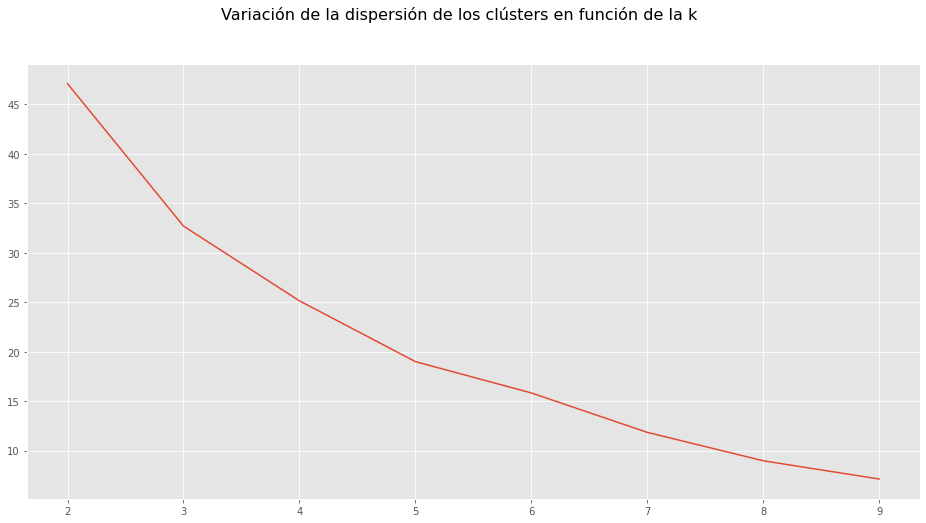

In [1228]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16)

    plt.savefig('plot_elbow')

Sin ser totalmente definitorio, vemos que el cambio de curva en 3 ó 4 nos podría marcar el número de grupos para agrupar a los equipos según los factores de Oliver

## Fit del KMeans

Segmentación de los equipos con la "k adecuada"

Hasta este punto, hemos manipulado nuestro dataset para poder usarlo con el **KMeans**.


In [1229]:
scaled_df.head()

,% TC Efectivo,Frec. TL,% Perd,% Reb Of
Equipo,,,,
REAL BETIS ENERGIA PLUS,2.070666,0.931829,-0.705635,0.605513
RETABET BILBAO BASKET,0.250686,-0.608822,-1.921544,0.402132
IBEROJET PALMA,1.405095,0.665883,-0.591917,0.348786
LIBERBANK OVIEDO BALONCESTO,1.920255,-0.443752,1.201330,-1.294934
CLUB MELILLA BALONCESTO,0.175480,0.060627,0.632739,0.752214


In [1230]:
# Fiteamos un modelo con el dataframe escalado, y cuatro grupos/clusters

cluster_model = KMeans(n_clusters = 4)
cluster_model.fit(scaled_df)

KMeans(n_clusters=4)

In [1231]:
# Calculamos el cluster de cada equipo, a partir del dataframe escalado 
labels = cluster_model.predict(scaled_df)

In [1232]:
# Y asignamos los clusters al dataframe original
scaled_df["cluster"] = labels

In [1233]:
scaled_df.shape

(18, 5)

In [1234]:
scaled_df["cluster"].unique()

array([1, 0, 3, 2], dtype=int32)

In [1235]:
scaled_df.reset_index(inplace = True)

In [1236]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Equipo         18 non-null     object 
 1   % TC Efectivo  18 non-null     float64
 2   Frec. TL       18 non-null     float64
 3   % Perd         18 non-null     float64
 4   % Reb Of       18 non-null     float64
 5   cluster        18 non-null     int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 920.0+ bytes


In [1237]:
df = scaled_df

In [1238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Equipo         18 non-null     object 
 1   % TC Efectivo  18 non-null     float64
 2   Frec. TL       18 non-null     float64
 3   % Perd         18 non-null     float64
 4   % Reb Of       18 non-null     float64
 5   cluster        18 non-null     int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 920.0+ bytes


In [1239]:
df.head()

,Equipo,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
0,REAL BETIS ENERGIA PLUS,2.070666,0.931829,-0.705635,0.605513,1
1,RETABET BILBAO BASKET,0.250686,-0.608822,-1.921544,0.402132,0
2,IBEROJET PALMA,1.405095,0.665883,-0.591917,0.348786,1
3,LIBERBANK OVIEDO BALONCESTO,1.920255,-0.443752,1.201330,-1.294934,3
4,CLUB MELILLA BALONCESTO,0.175480,0.060627,0.632739,0.752214,1


In [1240]:
df["Equipo"]

0                REAL BETIS ENERGIA PLUS 
1                  RETABET BILBAO BASKET 
2                         IBEROJET PALMA 
3            LIBERBANK OVIEDO BALONCESTO 
4                CLUB MELILLA BALONCESTO 
5             CARRAMIMBRE CBC VALLADOLID 
6                        COVIRAN GRANADA 
7                     RIO OURENSE TERMAL 
8              CHOCOLATES TRAPA PALENCIA 
9                         LEVITEC HUESCA 
10                      ICG FORCA LLEIDA 
11                          LEYMA CORUNA 
12                          TAU CASTELLO 
13                   ZTE REAL CANOE N.C. 
14    CACERES PATRIMONIO DE LA HUMANIDAD 
15                             C.B. PRAT 
16                           BARCA LASSA 
17                 SAENZ HORECA ARABERRI 
Name: Equipo, dtype: object

In [1241]:
df.insert(loc = 1, column = 'Clasificación', value= [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18])

In [1242]:
df.insert(loc = 1, column = 'Victorias', value= [30, 24, 22, 22, 21, 20, 20, 20, 19, 18, 16, 14, 13, 11, 11, 9, 9, 7])

In [1243]:
df.head()

,Equipo,Victorias,Clasificación,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
0,REAL BETIS ENERGIA PLUS,30,1,2.070666,0.931829,-0.705635,0.605513,1
1,RETABET BILBAO BASKET,24,2,0.250686,-0.608822,-1.921544,0.402132,0
2,IBEROJET PALMA,22,3,1.405095,0.665883,-0.591917,0.348786,1
3,LIBERBANK OVIEDO BALONCESTO,22,4,1.920255,-0.443752,1.201330,-1.294934,3
4,CLUB MELILLA BALONCESTO,21,5,0.175480,0.060627,0.632739,0.752214,1


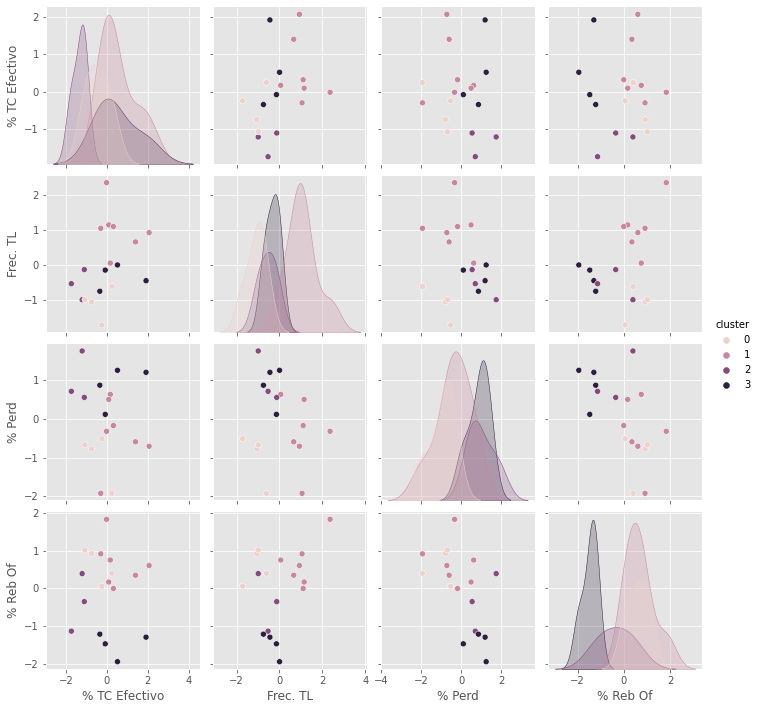

In [1244]:
# Visualizamos nuestros grupos en base a las variables que yo escoja
selected_columns = ["% TC Efectivo", "Frec. TL", "% Perd","% Reb Of" ]

# "bright", "colorblind", "pastel", "muted", "dark"
sns.set_palette("colorblind") 
sns.pairplot(df, vars = selected_columns, hue = 'cluster');




## Caracterización de los grupos de equipos creados

Una vez que tenemos hecha nuestra segmentación, vamos a crear una ficha resumen de cada grupo de equipos con las principales variables introducidas, o con aquellas que no se han utilizado en la segmentación para hacer un seguimiento periódico de los equipos.

---



In [1245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Equipo         18 non-null     object 
 1   Victorias      18 non-null     int64  
 2   Clasificación  18 non-null     int64  
 3   % TC Efectivo  18 non-null     float64
 4   Frec. TL       18 non-null     float64
 5   % Perd         18 non-null     float64
 6   % Reb Of       18 non-null     float64
 7   cluster        18 non-null     int32  
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 1.2+ KB


In [1246]:
df.head()

,Equipo,Victorias,Clasificación,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
0,REAL BETIS ENERGIA PLUS,30,1,2.070666,0.931829,-0.705635,0.605513,1
1,RETABET BILBAO BASKET,24,2,0.250686,-0.608822,-1.921544,0.402132,0
2,IBEROJET PALMA,22,3,1.405095,0.665883,-0.591917,0.348786,1
3,LIBERBANK OVIEDO BALONCESTO,22,4,1.920255,-0.443752,1.201330,-1.294934,3
4,CLUB MELILLA BALONCESTO,21,5,0.175480,0.060627,0.632739,0.752214,1


In [1247]:
ficha_df = pd.DataFrame()
ficha_df

""


In [1248]:
for i, col in enumerate([ "% TC Efectivo", "Frec. TL", "% Perd","% Reb Of" ]):
    resumen_data = df[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [1249]:
resumen_data

cluster               0         1         2         3
% Reb Of mean  0.600512  0.659811 -0.364715 -1.481645
         std   0.451479  0.609836  0.763600  0.327050
         min   0.058718 -0.004631 -1.134896 -1.945087
         25%   0.316278  0.258765 -0.743138 -1.590003
         50%   0.662193  0.605513 -0.351379 -1.383288
         75%   0.946426  0.833900  0.020375 -1.274929
         max   1.018943  1.832468  0.392129 -1.214915

In [1250]:
ficha_df

cluster                    0         1         2         3
% TC Efectivo mean -0.447788  0.539691 -1.341170  0.509206
              std   0.576674  0.861663  0.338454  1.007334
              min  -1.065416 -0.290796 -1.727227 -0.335919
              25%  -0.820057  0.045750 -1.464006 -0.138504
              50%  -0.488211  0.175480 -1.200786  0.226244
              75%  -0.115942  0.865493 -1.148142  0.873954
              max   0.250686  2.070666 -1.095498  1.920255
Frec. TL      mean -1.090276  1.047771 -0.549214 -0.331413
              std   0.459398  0.692385  0.431308  0.333970
              min  -1.713873  0.060627 -0.989400 -0.746380
              25%  -1.218663  0.798856 -0.760136 -0.519409
              50%  -1.019204  1.055631 -0.530873 -0.292438
              75%  -0.890816  1.128996 -0.329121 -0.104442
              max  -0.608822  2.362434 -0.127369  0.005604
% Perd        mean -0.970249 -0.368230  1.005968  0.860175
              std   0.643302  0.853993  0.651227  0.524172
              min  -1.921544 -1.921544  0.554011  0.116634
              25%  -1.062098 -0.648776  0.632739  0.680851
              50%  -0.723130 -0.320743  0.711467  1.035126
              75%  -0.631281  0.164745  1.231946  1.214451
              max  -0.513189  0.632739  1.752425  1.253815
% Reb Of      mean  0.600512  0.659811 -0.364715 -1.481645
              std   0.451479  0.609836  0.763600  0.327050
              min   0.058718 -0.004631 -1.134896 -1.945087
              25%   0.316278  0.258765 -0.743138 -1.590003
              50%   0.662193  0.605513 -0.351379 -1.383288
              75%   0.946426  0.833900  0.020375 -1.274929
              max   1.018943  1.832468  0.392129 -1.214915

In [1251]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

Sacar los equipos por cluster


In [1252]:
df.head()

,Equipo,Victorias,Clasificación,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
0,REAL BETIS ENERGIA PLUS,30,1,2.070666,0.931829,-0.705635,0.605513,1
1,RETABET BILBAO BASKET,24,2,0.250686,-0.608822,-1.921544,0.402132,0
2,IBEROJET PALMA,22,3,1.405095,0.665883,-0.591917,0.348786,1
3,LIBERBANK OVIEDO BALONCESTO,22,4,1.920255,-0.443752,1.201330,-1.294934,3
4,CLUB MELILLA BALONCESTO,21,5,0.175480,0.060627,0.632739,0.752214,1


In [1253]:
df['cluster'].value_counts()

1    7
0    4
3    4
2    3
Name: cluster, dtype: int64

In [1254]:
df.sort_values("Victorias", ascending = False)[['Equipo', "Victorias"]]

,Equipo,Victorias
0,REAL BETIS ENERGIA PLUS,30
1,RETABET BILBAO BASKET,24
2,IBEROJET PALMA,22
3,LIBERBANK OVIEDO BALONCESTO,22
4,CLUB MELILLA BALONCESTO,21
5,CARRAMIMBRE CBC VALLADOLID,20
6,COVIRAN GRANADA,20
7,RIO OURENSE TERMAL,20
8,CHOCOLATES TRAPA PALENCIA,19
9,LEVITEC HUESCA,18


In [1255]:
Equipos_propio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, REAL BETIS ENERGIA PLUS  to SAENZ HORECA ARABERRI 
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              18 non-null     int64  
 1   Victorias          18 non-null     int64  
 2   Puntos             18 non-null     float64
 3   T2 Anotados        18 non-null     float64
 4   T2 Lanzados        18 non-null     float64
 5   % T2               18 non-null     float64
 6   T3 Anotados        18 non-null     float64
 7   T3 Lanzados        18 non-null     float64
 8   % T3               18 non-null     float64
 9   T1 Anotados        18 non-null     float64
 10  T1 Lanzados        18 non-null     float64
 11  % T1               18 non-null     float64
 12  Reb. Ofensivos     18 non-null     float64
 13  Reb. Defensivos    18 non-null     float64
 14  Rebotes            18 non-null     float64
 15  Asistencias        18 non-null     flo

In [1256]:
Equipos_propio.reset_index( inplace = True)

In [1257]:
EP = Equipos_propio[["% TC Efectivo", "% Reb Of", "Frec. TL", "% Perd"]]

In [1258]:
EP

,% TC Efectivo,% Reb Of,Frec. TL,% Perd
0,55.72,30.18,20.21,14.41
1,50.88,29.57,16.85,13.02
2,53.95,29.41,19.63,14.54
3,55.32,24.48,17.21,16.59
4,50.68,30.62,18.31,15.94
5,49.44,31.11,20.48,13.02
6,50.19,33.86,23.33,14.85
7,50.48,28.87,20.69,15.79
8,51.08,28.35,20.59,15.02
9,51.61,22.53,18.19,16.65


In [1259]:
EP.reset_index(inplace = True)

In [1260]:
EP.head(1)

,index,% TC Efectivo,% Reb Of,Frec. TL,% Perd
0,0,55.72,30.18,20.21,14.41


In [1261]:
EP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          18 non-null     int64  
 1   % TC Efectivo  18 non-null     float64
 2   % Reb Of       18 non-null     float64
 3   Frec. TL       18 non-null     float64
 4   % Perd         18 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 848.0 bytes


In [1262]:
df.head(1)

,Equipo,Victorias,Clasificación,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
0,REAL BETIS ENERGIA PLUS,30,1,2.070666,0.931829,-0.705635,0.605513,1


In [1263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Equipo         18 non-null     object 
 1   Victorias      18 non-null     int64  
 2   Clasificación  18 non-null     int64  
 3   % TC Efectivo  18 non-null     float64
 4   Frec. TL       18 non-null     float64
 5   % Perd         18 non-null     float64
 6   % Reb Of       18 non-null     float64
 7   cluster        18 non-null     int32  
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 1.2+ KB


In [1264]:
#df.drop(["% TC Efectivo", "% Reb Of", "Frec. TL", "% Perd"], axis =1, inplace = True)

In [1265]:
#df = df.join(EP, how = "left", on = "Equipo", rsuffix = "", lsuffix = "")

Grupo 1

In [1266]:
df[df['cluster'] == 0].round(2)

,Equipo,Victorias,Clasificación,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
1,RETABET BILBAO BASKET,24,2,0.25,-0.61,-1.92,0.40,0
10,ICG FORCA LLEIDA,16,11,-0.74,-1.05,-0.78,0.92,0
11,LEYMA CORUNA,14,12,-0.24,-1.71,-0.51,0.06,0
17,SAENZ HORECA ARABERRI,7,18,-1.07,-0.98,-0.67,1.02,0


In [1267]:
df[["% TC Efectivo","Frec. TL", "% Perd", "% Reb Of"]].mean()

% TC Efectivo   -1.998401e-15
Frec. TL         2.004569e-15
% Perd          -1.918219e-15
% Reb Of        -5.551115e-16
dtype: float64

In [1268]:
df[df['cluster'] == 0][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Clasificación,Victorias
1,RETABET BILBAO BASKET,2,24
10,ICG FORCA LLEIDA,11,16
11,LEYMA CORUNA,12,14
17,SAENZ HORECA ARABERRI,18,7


Grupo 2

In [1269]:
df[df['cluster'] == 1]['Equipo']

0       REAL BETIS ENERGIA PLUS 
2                IBEROJET PALMA 
4       CLUB MELILLA BALONCESTO 
5    CARRAMIMBRE CBC VALLADOLID 
6               COVIRAN GRANADA 
7            RIO OURENSE TERMAL 
8     CHOCOLATES TRAPA PALENCIA 
Name: Equipo, dtype: object

In [1270]:
df[df['cluster'] == 1][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Clasificación,Victorias
0,REAL BETIS ENERGIA PLUS,1,30
2,IBEROJET PALMA,3,22
4,CLUB MELILLA BALONCESTO,5,21
5,CARRAMIMBRE CBC VALLADOLID,6,20
6,COVIRAN GRANADA,7,20
7,RIO OURENSE TERMAL,8,20
8,CHOCOLATES TRAPA PALENCIA,9,19


Grupo 3

In [1271]:
df[df['cluster'] == 2]['Equipo']

13    ZTE REAL CANOE N.C. 
15              C.B. PRAT 
16            BARCA LASSA 
Name: Equipo, dtype: object

In [1272]:
df[df['cluster'] == 2][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Clasificación,Victorias
13,ZTE REAL CANOE N.C.,14,11
15,C.B. PRAT,16,9
16,BARCA LASSA,17,9


Grupo 4

In [1273]:
df[df['cluster'] == 3]['Equipo']

3            LIBERBANK OVIEDO BALONCESTO 
9                         LEVITEC HUESCA 
12                          TAU CASTELLO 
14    CACERES PATRIMONIO DE LA HUMANIDAD 
Name: Equipo, dtype: object

In [1274]:
df[df['cluster'] == 3][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Clasificación,Victorias
3,LIBERBANK OVIEDO BALONCESTO,4,22
9,LEVITEC HUESCA,10,18
12,TAU CASTELLO,13,13
14,CACERES PATRIMONIO DE LA HUMANIDAD,15,11


# **2.Estadísticas del equipo rival**




In [1275]:
Equipos_rival = Equipos[Equipos["Condicion"] == "Rival"]

In [1276]:
Equipos_rival.head()

,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,BARCA LASSA,Rival,34.0,200.44,73.79,20.09,40.85,0.49,7.15,21.18,...,70.97,0.5,103.98,49.67,40.33,19.63,70.46,31.95,14.26,16.95
2,C.B. PRAT,Rival,34.0,201.81,80.00,20.50,37.56,0.55,8.74,24.91,...,70.68,0.5,113.19,53.79,42.93,20.48,72.69,34.11,16.66,16.39
4,CACERES PATRIMONIO DE LA HUMANIDAD,Rival,34.0,201.84,75.38,20.00,38.44,0.52,8.21,24.62,...,68.09,0.5,110.71,51.24,41.59,17.07,75.28,33.54,15.08,14.74
6,CARRAMIMBRE CBC VALLADOLID,Rival,34.0,201.41,74.35,17.85,36.32,0.49,8.41,24.82,...,70.00,0.5,106.22,49.83,41.26,21.93,68.89,24.29,14.21,14.42
8,CHOCOLATES TRAPA PALENCIA,Rival,34.0,202.52,78.91,20.44,38.74,0.53,8.47,25.50,...,72.21,0.5,109.29,51.60,42.41,19.64,71.65,25.38,14.03,14.43


In [1277]:
#Añadir las victorias para cada equipo
Equipos_rival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 34
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Equipo             18 non-null     object 
 1   Condicion          18 non-null     object 
 2   Partidos           18 non-null     float64
 3   Minutos            18 non-null     float64
 4   Puntos             18 non-null     float64
 5   T2 Anotados        18 non-null     float64
 6   T2 Lanzados        18 non-null     float64
 7   % T2               18 non-null     float64
 8   T3 Anotados        18 non-null     float64
 9   T3 Lanzados        18 non-null     float64
 10  % T3               18 non-null     float64
 11  T1 Anotados        18 non-null     float64
 12  T1 Lanzados        18 non-null     float64
 13  % T1               18 non-null     float64
 14  Reb. Ofensivos     18 non-null     float64
 15  Reb. Defensivos    18 non-null     float64
 16  Rebotes            18 non-nu

In [1278]:
Equipos_rival.insert(loc = 0, column = 'Victorias', value= [9, 9, 11, 20, 19, 21, 20, 22, 16, 18, 14, 22, 30, 24, 20, 7, 13, 11])

In [1279]:
Equipos_rival.sort_values("Victorias", ascending = False)[["Equipo", 'Victorias']]

,Equipo,Victorias
24,REAL BETIS ENERGIA PLUS,30
26,RETABET BILBAO BASKET,24
14,IBEROJET PALMA,22
22,LIBERBANK OVIEDO BALONCESTO,22
10,CLUB MELILLA BALONCESTO,21
6,CARRAMIMBRE CBC VALLADOLID,20
12,COVIRAN GRANADA,20
28,RIO OURENSE TERMAL,20
8,CHOCOLATES TRAPA PALENCIA,19
18,LEVITEC HUESCA,18


In [1280]:
Equipos_rival.head()

,Victorias,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,9,BARCA LASSA,Rival,34.0,200.44,73.79,20.09,40.85,0.49,7.15,...,70.97,0.5,103.98,49.67,40.33,19.63,70.46,31.95,14.26,16.95
2,9,C.B. PRAT,Rival,34.0,201.81,80.00,20.50,37.56,0.55,8.74,...,70.68,0.5,113.19,53.79,42.93,20.48,72.69,34.11,16.66,16.39
4,11,CACERES PATRIMONIO DE LA HUMANIDAD,Rival,34.0,201.84,75.38,20.00,38.44,0.52,8.21,...,68.09,0.5,110.71,51.24,41.59,17.07,75.28,33.54,15.08,14.74
6,20,CARRAMIMBRE CBC VALLADOLID,Rival,34.0,201.41,74.35,17.85,36.32,0.49,8.41,...,70.00,0.5,106.22,49.83,41.26,21.93,68.89,24.29,14.21,14.42
8,19,CHOCOLATES TRAPA PALENCIA,Rival,34.0,202.52,78.91,20.44,38.74,0.53,8.47,...,72.21,0.5,109.29,51.60,42.41,19.64,71.65,25.38,14.03,14.43


## Exploración con gráficos

Gráficos de dispersión

In [1281]:
Equipos_rival.columns

Index(['Victorias', 'Equipo', 'Condicion', 'Partidos', 'Minutos', 'Puntos',
       'T2 Anotados', 'T2 Lanzados', '% T2', 'T3 Anotados', 'T3 Lanzados',
       '% T3', 'T1 Anotados', 'T1 Lanzados', '% T1', 'Reb. Ofensivos',
       'Reb. Defensivos', 'Rebotes', 'Asistencias', 'Robos', 'Perdidas',
       'Tapones', 'Tapones Recibidos', 'Mates', 'Faltas Cometidas',
       'Faltas Recibidas', 'Valoracion', 'Posesiones', 'Ritmo', 'OER',
       '% TC Efectivo', '% Jugada', 'Frec. TL', '% Reb Def', '% Reb Of',
       '% Assis', '% Perd'],
      dtype='object')

In [1282]:
Equipos_rival.reset_index(inplace = True)

In [1283]:
Equipos_rival.head(1)

,index,Victorias,Equipo,Condicion,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,0,9,BARCA LASSA,Rival,34.0,200.44,73.79,20.09,40.85,0.49,...,70.97,0.5,103.98,49.67,40.33,19.63,70.46,31.95,14.26,16.95


In [1284]:
# Histograma % TC Efectivo
Equipos_rival = Equipos_rival.sort_values("Victorias", ascending = False)
plt.figure(figsize = (15,5))
px.histogram(Equipos_rival, x = "Equipo", y = "% TC Efectivo", color = "Equipo", title = "Porcentaje tiros de campo efectivo por número de victorias", width = 1200, height = 650 , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1285]:
# Histograma Frec. TL
plt.figure(figsize = (15,5))
px.histogram(Equipos_rival, x = "Equipo", y = "Frec. TL", color = "Equipo", title = "Frecuencia TL por número de victorias", width = 1200, height = 650 , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1286]:
# Histograma % Rebote Ofensivo
plt.figure(figsize = (15,5))
px.histogram(Equipos_rival, x = "Equipo", y = "% Reb Of", color = "Equipo", title = "Porcentaje rebote ofensivo por número de victorias", width = 1200, height = 650 , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1287]:
# Histograma % Pérdidas
plt.figure(figsize = (15,5))
px.histogram(Equipos_rival, x = "Equipo", y = "% Perd", color = "Equipo", title = "Porcentaje pérdidas por número de victorias", width = 1200, height = 650 , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1288]:
# Gráficos de dispersión
px.scatter(Equipos_rival, x = "% TC Efectivo", y = "% Reb Of", color = "Equipo", size = "Frec. TL", size_max = 30, hover_name = "Equipo")

In [1289]:
# Sunburst
px.sunburst(Equipos_rival, color = "Equipo" , values = "% TC Efectivo", path = ["Equipo","% Reb Of" ], hover_name = "Equipo", height = 700)

In [1290]:
# Treemap
px.treemap(Equipos_rival, path=['Equipo'], values ="% TC Efectivo" , hover_name = 'Equipo', color = "% Reb Of", height=700,
           title = "Estadísticas rivales, tiro de campo efectivo y porcentaje de rebote ofensivo")

In [1291]:
# Treemap
px.treemap(Equipos_rival, path=['Equipo'], values ="% TC Efectivo" , hover_name = 'Equipo', color = "% Perd", height=700,
           title = "Estadísticas rivales, tiro de campo efectivo y porcentaje de pérdidas")

## Finalizar el tratamiento del dataset



### Escalado de datos

In [1292]:
Equipos_rival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 12 to 15
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              18 non-null     int64  
 1   Victorias          18 non-null     int64  
 2   Equipo             18 non-null     object 
 3   Condicion          18 non-null     object 
 4   Partidos           18 non-null     float64
 5   Minutos            18 non-null     float64
 6   Puntos             18 non-null     float64
 7   T2 Anotados        18 non-null     float64
 8   T2 Lanzados        18 non-null     float64
 9   % T2               18 non-null     float64
 10  T3 Anotados        18 non-null     float64
 11  T3 Lanzados        18 non-null     float64
 12  % T3               18 non-null     float64
 13  T1 Anotados        18 non-null     float64
 14  T1 Lanzados        18 non-null     float64
 15  % T1               18 non-null     float64
 16  Reb. Ofensivos     18 non-n

In [1293]:
Equipos_rival.set_index("Equipo", inplace = True)

In [1294]:
Equipos_rival.drop("Condicion", axis = 1, inplace = True)

In [1295]:
Equipos_rival.drop(["Partidos", "Minutos"], axis = 1, inplace = True)

In [1296]:
# Escalado de datos con StandardScaler
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(Equipos_rival)
scaled_df = pd.DataFrame(scaled_df, index = Equipos_rival.index, columns = Equipos_rival.columns)

In [1297]:
"""# Escalado de datos con MixMaxScaler
MinMax_scaler = MinMaxScaler()
scaled_df = MinMax_scaler.fit_transform(Equipos_propio)
scaled_df = pd.DataFrame(scaled_df, index = Equipos_propio.index, columns = Equipos_propio.columns)"""

'# Escalado de datos con MixMaxScaler\nMinMax_scaler = MinMaxScaler()\nscaled_df = MinMax_scaler.fit_transform(Equipos_propio)\nscaled_df = pd.DataFrame(scaled_df, index = Equipos_propio.index, columns = Equipos_propio.columns)'

## Número de clusters idóneos con cálculo del elbow

In [1298]:
# Para sacar el número ideal de grupos de equipos pasaremos las cuatro variables que representan los cuatro factores de Oliver
scaled_df = scaled_df[["% TC Efectivo", "Frec. TL", "% Perd",
                       "% Reb Of" ]]

In [1299]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, REAL BETIS ENERGIA PLUS  to SAENZ HORECA ARABERRI 
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   % TC Efectivo  18 non-null     float64
 1   Frec. TL       18 non-null     float64
 2   % Perd         18 non-null     float64
 3   % Reb Of       18 non-null     float64
dtypes: float64(4)
memory usage: 720.0+ bytes


In [1300]:
CALCULATE_ELBOW = True

if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 10):

        print(f"Fitting pipe with {k} clusters")
        cluster_model = KMeans(n_clusters = k)
        cluster_model.fit(scaled_df)
        

        sse[k] = cluster_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Elbow curve took 0 minutes.


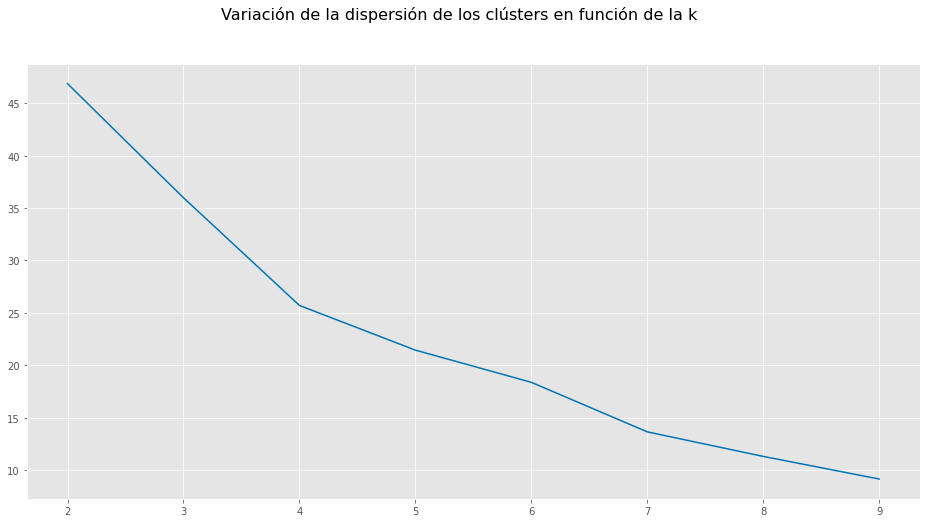

In [1301]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16)

    plt.savefig('plot_elbow')

Sin ser totalmente definitorio, vemos que el cambio de curva en 3 ó 4 nos podría marcar el número de grupos para agrupar a los equipos según los factores de Oliver

## Fit del KMeans

Segmentación de los equipos con la "k adecuada"

Hasta este punto, hemos manipulado nuestro dataset para poder usarlo con el **KMeans**.


In [1302]:
scaled_df.head()

,% TC Efectivo,Frec. TL,% Perd,% Reb Of
Equipo,,,,
REAL BETIS ENERGIA PLUS,0.013093,-0.940986,0.458525,-0.116803
RETABET BILBAO BASKET,-0.868518,1.139089,1.592241,-1.394958
IBEROJET PALMA,1.156570,-0.568365,0.694338,-1.374935
LIBERBANK OVIEDO BALONCESTO,-2.204029,0.238195,-2.062859,-0.090105
CLUB MELILLA BALONCESTO,-1.016908,-0.308945,-1.183096,-0.216919


In [1303]:
# Fiteamos un modelo con el dataframe escalado, y cuatro grupos/clusters

cluster_model = KMeans(n_clusters = 4)
cluster_model.fit(scaled_df)

KMeans(n_clusters=4)

In [1304]:
# Calculamos el cluster de cada equipo, a partir del dataframe escalado 
labels = cluster_model.predict(scaled_df)

In [1305]:
# Y asignamos los clusters al dataframe original
scaled_df["cluster"] = labels

In [1306]:
scaled_df.shape

(18, 5)

In [1307]:
scaled_df["cluster"].unique()

array([2, 3, 1, 0], dtype=int32)

In [1308]:
scaled_df.reset_index(inplace = True)

In [1309]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Equipo         18 non-null     object 
 1   % TC Efectivo  18 non-null     float64
 2   Frec. TL       18 non-null     float64
 3   % Perd         18 non-null     float64
 4   % Reb Of       18 non-null     float64
 5   cluster        18 non-null     int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 920.0+ bytes


In [1310]:
df = scaled_df

In [1311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Equipo         18 non-null     object 
 1   % TC Efectivo  18 non-null     float64
 2   Frec. TL       18 non-null     float64
 3   % Perd         18 non-null     float64
 4   % Reb Of       18 non-null     float64
 5   cluster        18 non-null     int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 920.0+ bytes


In [1312]:
df.head()

,Equipo,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
0,REAL BETIS ENERGIA PLUS,0.013093,-0.940986,0.458525,-0.116803,2
1,RETABET BILBAO BASKET,-0.868518,1.139089,1.592241,-1.394958,3
2,IBEROJET PALMA,1.156570,-0.568365,0.694338,-1.374935,2
3,LIBERBANK OVIEDO BALONCESTO,-2.204029,0.238195,-2.062859,-0.090105,1
4,CLUB MELILLA BALONCESTO,-1.016908,-0.308945,-1.183096,-0.216919,1


In [1313]:
df.insert(loc = 1, column = 'Victorias', value= [9, 9, 11, 20, 19, 21, 20, 22, 16, 18, 14, 22, 30, 24, 20, 7, 13, 11])

In [1314]:
df["Equipo"]

0                REAL BETIS ENERGIA PLUS 
1                  RETABET BILBAO BASKET 
2                         IBEROJET PALMA 
3            LIBERBANK OVIEDO BALONCESTO 
4                CLUB MELILLA BALONCESTO 
5             CARRAMIMBRE CBC VALLADOLID 
6                        COVIRAN GRANADA 
7                     RIO OURENSE TERMAL 
8              CHOCOLATES TRAPA PALENCIA 
9                         LEVITEC HUESCA 
10                      ICG FORCA LLEIDA 
11                          LEYMA CORUNA 
12                          TAU CASTELLO 
13                   ZTE REAL CANOE N.C. 
14    CACERES PATRIMONIO DE LA HUMANIDAD 
15                             C.B. PRAT 
16                           BARCA LASSA 
17                 SAENZ HORECA ARABERRI 
Name: Equipo, dtype: object

In [1315]:
df.insert(loc = 1, column = 'Clasificación', value= [17, 16, 14, 6, 9, 5,8,3,11,10,12,4,1,2,7,18,13,15])

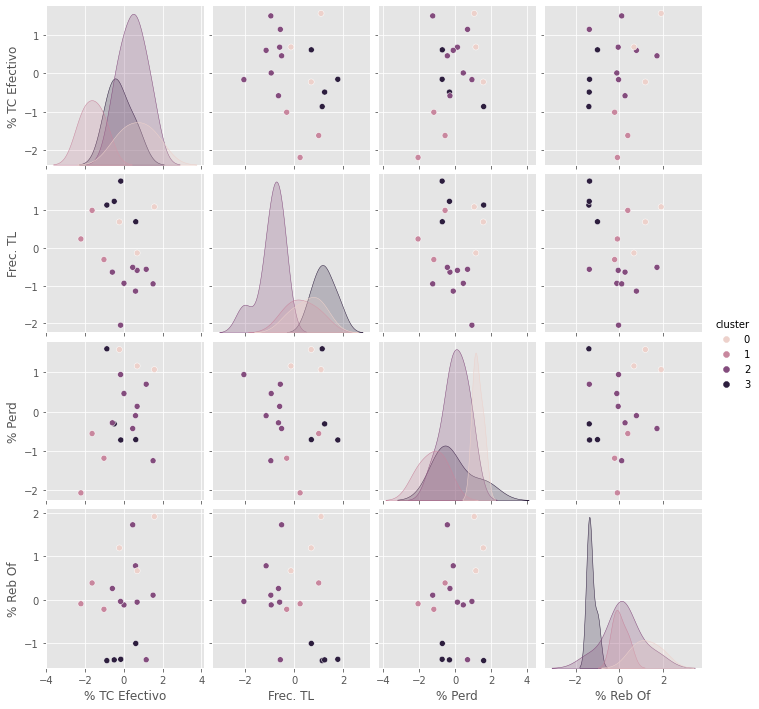

In [1316]:
# Visualizamos nuestros grupos en base a las variables que yo escoja
selected_columns = ["% TC Efectivo", "Frec. TL", "% Perd","% Reb Of" ]

# "bright", "colorblind", "pastel", "muted", "dark"
sns.set_palette("colorblind") 
sns.pairplot(df, vars = selected_columns, hue = 'cluster');




## Caracterización de los grupos de equipos creados

Una vez que tenemos hecha nuestra segmentación, vamos a crear una ficha resumen de cada grupo de equipos con las principales variables introducidas, o con aquellas que no se han utilizado en la segmentación para hacer un seguimiento periódico de los equipos.

---



In [1317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Equipo         18 non-null     object 
 1   Clasificación  18 non-null     int64  
 2   Victorias      18 non-null     int64  
 3   % TC Efectivo  18 non-null     float64
 4   Frec. TL       18 non-null     float64
 5   % Perd         18 non-null     float64
 6   % Reb Of       18 non-null     float64
 7   cluster        18 non-null     int32  
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 1.2+ KB


In [1318]:
df.head()

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
0,REAL BETIS ENERGIA PLUS,17,9,0.013093,-0.940986,0.458525,-0.116803,2
1,RETABET BILBAO BASKET,16,9,-0.868518,1.139089,1.592241,-1.394958,3
2,IBEROJET PALMA,14,11,1.156570,-0.568365,0.694338,-1.374935,2
3,LIBERBANK OVIEDO BALONCESTO,6,20,-2.204029,0.238195,-2.062859,-0.090105,1
4,CLUB MELILLA BALONCESTO,9,19,-1.016908,-0.308945,-1.183096,-0.216919,1


In [1319]:
ficha_df = pd.DataFrame()
ficha_df

""


In [1320]:
for i, col in enumerate([ "% TC Efectivo", "Frec. TL", "% Perd","% Reb Of" ]):
    resumen_data = df[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [1321]:
resumen_data

cluster               0         1         2         3
% Reb Of mean  1.257020  0.026698  0.161021 -1.284830
         std   0.624982  0.318508  0.874655  0.189508
         min   0.667444 -0.216919 -1.374935 -1.394958
         25%   0.929416 -0.153512 -0.069247 -1.382444
         50%   1.191388 -0.090105  0.035041 -1.371598
         75%   1.551808  0.148506  0.390455 -1.273984
         max   1.912228  0.387118  1.722006 -1.001166

In [1322]:
ficha_df

cluster                    0         1         2         3
% TC Efectivo mean  0.682303 -1.616288  0.461537 -0.222585
              std   0.899126  0.593646  0.690728  0.633116
              min  -0.222585 -2.204029 -0.584831 -0.868518
              25%   0.235678 -1.915977 -0.030551 -0.583740
              50%   0.693942 -1.627926  0.534641 -0.320784
              75%   1.134747 -1.322417  0.806325  0.040371
              max   1.575553 -1.016908  1.510087  0.619747
Frec. TL      mean  0.549498  0.308945 -0.928015  1.212198
              std   0.625299  0.656133  0.508068  0.443648
              min  -0.134427 -0.308945 -2.054133  0.695717
              25%   0.278287 -0.035375 -1.003483  1.028246
              50%   0.691000  0.238195 -0.792409  1.188614
              75%   0.891461  0.617891 -0.589590  1.372566
              max   1.091921  0.997587 -0.516481  1.775846
% Perd        mean  1.265731 -1.267747  0.019777 -0.038042
              std   0.270880  0.756349  0.698982  1.103389
              min   1.066197 -2.062859 -1.246584 -0.720540
              25%   1.111546 -1.622978 -0.321471 -0.713737
              50%   1.156894 -1.183096  0.014108 -0.511936
              75%   1.365498 -0.870190  0.517478  0.163759
              max   1.574102 -0.557284  0.939221  1.592241
% Reb Of      mean  1.257020  0.026698  0.161021 -1.284830
              std   0.624982  0.318508  0.874655  0.189508
              min   0.667444 -0.216919 -1.374935 -1.394958
              25%   0.929416 -0.153512 -0.069247 -1.382444
              50%   1.191388 -0.090105  0.035041 -1.371598
              75%   1.551808  0.148506  0.390455 -1.273984
              max   1.912228  0.387118  1.722006 -1.001166

In [1323]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

In [1324]:
Equipos_rival.reset_index(inplace = True)

In [1325]:
ER = Equipos_rival[["Equipo","% TC Efectivo", "% Reb Of", "Frec. TL", "% Perd"]]

In [1326]:
ER

,Equipo,% TC Efectivo,% Reb Of,Frec. TL,% Perd
0,REAL BETIS ENERGIA PLUS,50.21,28.03,16.17,15.72
1,RETABET BILBAO BASKET,48.19,24.20,20.58,16.97
2,IBEROJET PALMA,52.83,24.26,16.96,15.98
3,LIBERBANK OVIEDO BALONCESTO,45.13,28.11,18.67,12.94
4,CLUB MELILLA BALONCESTO,47.85,27.73,17.51,13.91
5,CARRAMIMBRE CBC VALLADOLID,49.83,24.29,21.93,14.42
6,COVIRAN GRANADA,49.06,24.25,20.79,14.87
7,RIO OURENSE TERMAL,49.81,28.27,13.81,16.25
8,CHOCOLATES TRAPA PALENCIA,51.60,25.38,19.64,14.43
9,LEVITEC HUESCA,46.45,29.54,20.28,14.60


Sacar los equipos por cluster


In [1327]:
df.head(1)

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
0,REAL BETIS ENERGIA PLUS,17,9,0.013093,-0.940986,0.458525,-0.116803,2


In [1328]:
df['cluster'].value_counts()

2    8
3    4
1    3
0    3
Name: cluster, dtype: int64

In [1329]:
df.sort_values("Victorias", ascending = False)[['Equipo', "Victorias"]]

,Equipo,Victorias
12,TAU CASTELLO,30
13,ZTE REAL CANOE N.C.,24
7,RIO OURENSE TERMAL,22
11,LEYMA CORUNA,22
5,CARRAMIMBRE CBC VALLADOLID,21
3,LIBERBANK OVIEDO BALONCESTO,20
6,COVIRAN GRANADA,20
14,CACERES PATRIMONIO DE LA HUMANIDAD,20
4,CLUB MELILLA BALONCESTO,19
9,LEVITEC HUESCA,18


Grupo 1

In [1330]:
df[df['cluster'] == 0]

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,cluster
13,ZTE REAL CANOE N.C.,2,24,0.693942,-0.134427,1.156894,0.667444,0
15,C.B. PRAT,18,7,1.575553,1.091921,1.066197,1.912228,0
16,BARCA LASSA,13,13,-0.222585,0.691000,1.574102,1.191388,0


In [1331]:
df[df['cluster'] == 0][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Clasificación,Victorias
13,ZTE REAL CANOE N.C.,2,24
16,BARCA LASSA,13,13
15,C.B. PRAT,18,7


Grupo 2

In [1332]:
df[df['cluster'] == 1]['Equipo']

3    LIBERBANK OVIEDO BALONCESTO 
4        CLUB MELILLA BALONCESTO 
9                 LEVITEC HUESCA 
Name: Equipo, dtype: object

In [1333]:
df[df['cluster'] == 1][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Clasificación,Victorias
3,LIBERBANK OVIEDO BALONCESTO,6,20
4,CLUB MELILLA BALONCESTO,9,19
9,LEVITEC HUESCA,10,18


Grupo 3

In [1334]:
df[df['cluster'] == 2]['Equipo']

0                REAL BETIS ENERGIA PLUS 
2                         IBEROJET PALMA 
7                     RIO OURENSE TERMAL 
10                      ICG FORCA LLEIDA 
11                          LEYMA CORUNA 
12                          TAU CASTELLO 
14    CACERES PATRIMONIO DE LA HUMANIDAD 
17                 SAENZ HORECA ARABERRI 
Name: Equipo, dtype: object

In [1335]:
df[df['cluster'] == 2][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Clasificación,Victorias
12,TAU CASTELLO,1,30
7,RIO OURENSE TERMAL,3,22
11,LEYMA CORUNA,4,22
14,CACERES PATRIMONIO DE LA HUMANIDAD,7,20
10,ICG FORCA LLEIDA,12,14
2,IBEROJET PALMA,14,11
17,SAENZ HORECA ARABERRI,15,11
0,REAL BETIS ENERGIA PLUS,17,9


Grupo 4

In [1336]:
df[df['cluster'] == 3]['Equipo']

1         RETABET BILBAO BASKET 
5    CARRAMIMBRE CBC VALLADOLID 
6               COVIRAN GRANADA 
8     CHOCOLATES TRAPA PALENCIA 
Name: Equipo, dtype: object

In [1337]:
df[df['cluster'] == 3][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

,Equipo,Clasificación,Victorias
5,CARRAMIMBRE CBC VALLADOLID,5,21
6,COVIRAN GRANADA,8,20
8,CHOCOLATES TRAPA PALENCIA,11,16
1,RETABET BILBAO BASKET,16,9


# **3.Unión de estadísticas propias y del rival**

In [1338]:
Equipos_propio.head()

,Equipo,index,Victorias,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,% T3,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,REAL BETIS ENERGIA PLUS,12,30,82.21,20.06,37.53,0.53,9.82,24.91,0.39,...,69.15,0.5,118.89,55.72,44.70,20.21,71.97,30.18,15.20,14.41
1,RETABET BILBAO BASKET,13,24,77.24,20.38,37.62,0.54,8.50,27.50,0.31,...,69.94,0.5,110.43,50.88,42.09,16.85,75.80,29.57,17.15,13.02
2,IBEROJET PALMA,7,22,78.35,20.62,37.71,0.55,8.35,23.74,0.35,...,68.50,0.5,114.38,53.95,44.01,19.63,75.74,29.41,15.21,14.54
3,LIBERBANK OVIEDO BALONCESTO,11,22,76.68,17.65,33.21,0.53,10.35,26.76,0.39,...,69.18,0.5,110.84,55.32,42.19,17.21,71.89,24.48,17.25,16.59
4,CLUB MELILLA BALONCESTO,5,21,74.59,21.62,42.53,0.51,6.65,19.79,0.34,...,69.94,0.5,106.64,50.68,41.70,18.31,72.27,30.62,14.61,15.94


In [1339]:
Equipos_propio.drop(["index", "Victorias"], axis = 1, inplace = True)

In [1340]:
Equipos_rival.head()

,Equipo,index,Victorias,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,% T3,...,Posesiones,Ritmo,OER,% TC Efectivo,% Jugada,Frec. TL,% Reb Def,% Reb Of,% Assis,% Perd
0,REAL BETIS ENERGIA PLUS,24,30,72.94,17.82,36.94,0.48,9.06,25.62,0.35,...,68.94,0.5,105.80,50.21,39.56,16.17,69.82,28.03,15.85,15.72
1,RETABET BILBAO BASKET,26,24,69.21,17.35,36.59,0.47,7.44,22.59,0.33,...,69.56,0.5,99.49,48.19,39.00,20.58,70.43,24.20,14.13,16.97
2,IBEROJET PALMA,14,22,72.74,18.68,36.29,0.51,8.44,23.03,0.37,...,67.38,0.5,107.94,52.83,41.70,16.96,70.59,24.26,13.69,15.98
3,LIBERBANK OVIEDO BALONCESTO,22,22,70.35,20.15,43.26,0.47,6.00,21.32,0.28,...,69.38,0.5,101.40,45.13,39.42,18.67,75.52,28.11,12.53,12.94
4,CLUB MELILLA BALONCESTO,10,21,73.59,18.09,38.41,0.47,8.68,26.59,0.33,...,70.62,0.5,104.21,47.85,39.27,17.51,69.38,27.73,14.70,13.91


In [1341]:
Equipos_rival.reset_index(inplace = True)

In [1342]:
Equipos_propio_rival = Equipos_propio.join(Equipos_rival, how = "left", on = Equipos_propio.index, rsuffix = "_rival")

In [1343]:
Equipos_propio_rival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Equipo                   18 non-null     object 
 1   Puntos                   18 non-null     float64
 2   T2 Anotados              18 non-null     float64
 3   T2 Lanzados              18 non-null     float64
 4   % T2                     18 non-null     float64
 5   T3 Anotados              18 non-null     float64
 6   T3 Lanzados              18 non-null     float64
 7   % T3                     18 non-null     float64
 8   T1 Anotados              18 non-null     float64
 9   T1 Lanzados              18 non-null     float64
 10  % T1                     18 non-null     float64
 11  Reb. Ofensivos           18 non-null     float64
 12  Reb. Defensivos          18 non-null     float64
 13  Rebotes                  18 non-null     float64
 14  Asistencias              18 

## Exploración con gráficos

Gráficos de dispersión

In [1344]:
Equipos_propio_rival.columns

Index(['Equipo', 'Puntos', 'T2 Anotados', 'T2 Lanzados', '% T2', 'T3 Anotados',
       'T3 Lanzados', '% T3', 'T1 Anotados', 'T1 Lanzados', '% T1',
       'Reb. Ofensivos', 'Reb. Defensivos', 'Rebotes', 'Asistencias', 'Robos',
       'Perdidas', 'Tapones', 'Tapones Recibidos', 'Mates', 'Faltas Cometidas',
       'Faltas Recibidas', 'Valoracion', 'Posesiones', 'Ritmo', 'OER',
       '% TC Efectivo', '% Jugada', 'Frec. TL', '% Reb Def', '% Reb Of',
       '% Assis', '% Perd', 'level_0', 'Equipo_rival', 'index', 'Victorias',
       'Puntos_rival', 'T2 Anotados_rival', 'T2 Lanzados_rival', '% T2_rival',
       'T3 Anotados_rival', 'T3 Lanzados_rival', '% T3_rival',
       'T1 Anotados_rival', 'T1 Lanzados_rival', '% T1_rival',
       'Reb. Ofensivos_rival', 'Reb. Defensivos_rival', 'Rebotes_rival',
       'Asistencias_rival', 'Robos_rival', 'Perdidas_rival', 'Tapones_rival',
       'Tapones Recibidos_rival', 'Mates_rival', 'Faltas Cometidas_rival',
       'Faltas Recibidas_rival', 'Valorac

In [1345]:
Equipos_propio_rival.head(1)

,Equipo,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,% T3,T1 Anotados,T1 Lanzados,...,Posesiones_rival,Ritmo_rival,OER_rival,% TC Efectivo_rival,% Jugada_rival,Frec. TL_rival,% Reb Def_rival,% Reb Of_rival,% Assis_rival,% Perd_rival
0,REAL BETIS ENERGIA PLUS,82.21,20.06,37.53,0.53,9.82,24.91,0.39,12.62,16.15,...,68.94,0.5,105.8,50.21,39.56,16.17,69.82,28.03,15.85,15.72


In [1346]:
# Histograma % TC Efectivo
Equipos_propio_rival = Equipos_propio_rival.sort_values("Victorias", ascending = False)
plt.figure(figsize = (15,5))
px.histogram(Equipos_propio_rival, x = "Equipo", y = "% TC Efectivo", color = "Equipo", title = "%TC efectivo por número de victorias" , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1347]:
# Histograma Frec. TL
plt.figure(figsize = (15,5))
px.histogram(Equipos_propio_rival, x = "Equipo", y = "Frec. TL", color = "Equipo", title = "Frecuencia TL por número de victorias" , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1348]:
# Histograma % Rebote Ofensivo
plt.figure(figsize = (15,5))
px.histogram(Equipos_propio_rival, x = "Equipo", y = "% Reb Of", color = "Equipo", title = "% Reb Of por número de victorias" , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1349]:
# Histograma % Pérdidas
plt.figure(figsize = (15,5))
px.histogram(Equipos_propio_rival, x = "Equipo", y = "% Perd", color = "Equipo", title = "% Pérdidas por número de victorias" , log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1350]:
# Gráficos de dispersión
px.scatter(Equipos_propio_rival, x = "% TC Efectivo", y = "% Reb Of", color = "Equipo", size = "Frec. TL", size_max = 30,hover_name = "Equipo")

In [1351]:
# Sunburst
px.sunburst(Equipos_propio_rival, color = "Equipo" , values = "% TC Efectivo", path = ["Equipo","% Reb Of" ], hover_name = "Equipo", height = 700)

In [1352]:
# Treemap
px.treemap(Equipos_propio_rival, path=['Equipo'], values ="% TC Efectivo" , hover_name = 'Equipo', color = "% Reb Of", height=700)

## Finalizar el tratamiento del dataset



### Escalado de datos

In [1353]:
Equipos_propio_rival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Equipo                   18 non-null     object 
 1   Puntos                   18 non-null     float64
 2   T2 Anotados              18 non-null     float64
 3   T2 Lanzados              18 non-null     float64
 4   % T2                     18 non-null     float64
 5   T3 Anotados              18 non-null     float64
 6   T3 Lanzados              18 non-null     float64
 7   % T3                     18 non-null     float64
 8   T1 Anotados              18 non-null     float64
 9   T1 Lanzados              18 non-null     float64
 10  % T1                     18 non-null     float64
 11  Reb. Ofensivos           18 non-null     float64
 12  Reb. Defensivos          18 non-null     float64
 13  Rebotes                  18 non-null     float64
 14  Asistencias              18 

In [1354]:
Equipos_propio_rival.head()

,Equipo,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,% T3,T1 Anotados,T1 Lanzados,...,Posesiones_rival,Ritmo_rival,OER_rival,% TC Efectivo_rival,% Jugada_rival,Frec. TL_rival,% Reb Def_rival,% Reb Of_rival,% Assis_rival,% Perd_rival
0,REAL BETIS ENERGIA PLUS,82.21,20.06,37.53,0.53,9.82,24.91,0.39,12.62,16.15,...,68.94,0.5,105.80,50.21,39.56,16.17,69.82,28.03,15.85,15.72
1,RETABET BILBAO BASKET,77.24,20.38,37.62,0.54,8.50,27.50,0.31,10.97,15.44,...,69.56,0.5,99.49,48.19,39.00,20.58,70.43,24.20,14.13,16.97
2,IBEROJET PALMA,78.35,20.62,37.71,0.55,8.35,23.74,0.35,12.06,16.68,...,67.38,0.5,107.94,52.83,41.70,16.96,70.59,24.26,13.69,15.98
3,LIBERBANK OVIEDO BALONCESTO,76.68,17.65,33.21,0.53,10.35,26.76,0.39,10.32,14.24,...,69.38,0.5,101.40,45.13,39.42,18.67,75.52,28.11,12.53,12.94
4,CLUB MELILLA BALONCESTO,74.59,21.62,42.53,0.51,6.65,19.79,0.34,11.41,15.97,...,70.62,0.5,104.21,47.85,39.27,17.51,69.38,27.73,14.70,13.91


In [1355]:
Equipos_propio_rival.drop(["level_0", "Equipo_rival"], axis = 1, inplace = True)

In [1356]:
Equipos_propio_rival.set_index ("Equipo", inplace = True)

In [1357]:
Equipos_propio_rival.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, REAL BETIS ENERGIA PLUS  to SAENZ HORECA ARABERRI 
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Puntos                   18 non-null     float64
 1   T2 Anotados              18 non-null     float64
 2   T2 Lanzados              18 non-null     float64
 3   % T2                     18 non-null     float64
 4   T3 Anotados              18 non-null     float64
 5   T3 Lanzados              18 non-null     float64
 6   % T3                     18 non-null     float64
 7   T1 Anotados              18 non-null     float64
 8   T1 Lanzados              18 non-null     float64
 9   % T1                     18 non-null     float64
 10  Reb. Ofensivos           18 non-null     float64
 11  Reb. Defensivos          18 non-null     float64
 12  Rebotes                  18 non-null     float64
 13  Asistencias              18 non-null     flo

In [1358]:
Equipos_propio_rival = Equipos_propio_rival[["% TC Efectivo", "Frec. TL", "% Perd","% Reb Of" ,
                       "% TC Efectivo_rival", "Frec. TL_rival", "% Perd_rival","% Reb Of_rival"]]

In [1359]:
# Escalado de datos con StandardScaler
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(Equipos_propio_rival)
scaled_df = pd.DataFrame(scaled_df, index = Equipos_propio_rival.index, columns = Equipos_propio_rival.columns)

In [1360]:
"""# Escalado de datos con MixMaxScaler
MinMax_scaler = MinMaxScaler()
scaled_df = MinMax_scaler.fit_transform(Equipos_propio)
scaled_df = pd.DataFrame(scaled_df, index = Equipos_propio.index, columns = Equipos_propio.columns)"""

'# Escalado de datos con MixMaxScaler\nMinMax_scaler = MinMaxScaler()\nscaled_df = MinMax_scaler.fit_transform(Equipos_propio)\nscaled_df = pd.DataFrame(scaled_df, index = Equipos_propio.index, columns = Equipos_propio.columns)'

## Número de clusters idóneos con cálculo del elbow

In [1361]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, REAL BETIS ENERGIA PLUS  to SAENZ HORECA ARABERRI 
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   % TC Efectivo        18 non-null     float64
 1   Frec. TL             18 non-null     float64
 2   % Perd               18 non-null     float64
 3   % Reb Of             18 non-null     float64
 4   % TC Efectivo_rival  18 non-null     float64
 5   Frec. TL_rival       18 non-null     float64
 6   % Perd_rival         18 non-null     float64
 7   % Reb Of_rival       18 non-null     float64
dtypes: float64(8)
memory usage: 1.3+ KB


In [1362]:
# Para sacar el número ideal de grupos de equipos pasaremos las cuatro variables que representan los cuatro factores de Oliver
scaled_df = scaled_df[["% TC Efectivo", "Frec. TL", "% Perd","% Reb Of" ,
                       "% TC Efectivo_rival", "Frec. TL_rival", "% Perd_rival","% Reb Of_rival"]]

In [1363]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, REAL BETIS ENERGIA PLUS  to SAENZ HORECA ARABERRI 
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   % TC Efectivo        18 non-null     float64
 1   Frec. TL             18 non-null     float64
 2   % Perd               18 non-null     float64
 3   % Reb Of             18 non-null     float64
 4   % TC Efectivo_rival  18 non-null     float64
 5   Frec. TL_rival       18 non-null     float64
 6   % Perd_rival         18 non-null     float64
 7   % Reb Of_rival       18 non-null     float64
dtypes: float64(8)
memory usage: 1.3+ KB


In [1364]:
CALCULATE_ELBOW = True

if CALCULATE_ELBOW:
    st = time.time()

    sse = {}

    for k in range(2, 10):

        print(f"Fitting pipe with {k} clusters")
        cluster_model = KMeans(n_clusters = k)
        cluster_model.fit(scaled_df)
        

        sse[k] = cluster_model.inertia_

    et = time.time()
    print("Elbow curve took {} minutes.".format(round((et - st)/60), 2))

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Elbow curve took 0 minutes.


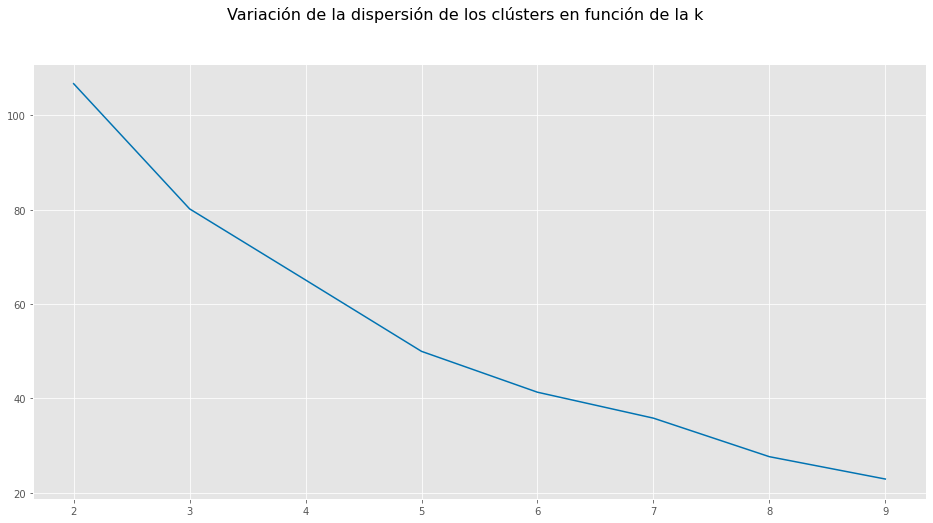

In [1365]:
if CALCULATE_ELBOW:
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot()

    x_values = list(sse.keys())
    y_values = list(sse.values())

    ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
    fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16)

    plt.savefig('plot_elbow')

Sin ser totalmente definitorio, vemos que el cambio de curva en 3 ó 4 nos podría marcar el número de grupos para agrupar a los equipos según los factores de Oliver

## Fit del KMeans

Segmentación de los equipos con la "k adecuada"

Hasta este punto, hemos manipulado nuestro dataset para poder usarlo con el **KMeans**.


In [1366]:
scaled_df.head()

,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
Equipo,,,,,,,,
REAL BETIS ENERGIA PLUS,2.070666,0.931829,-0.705635,0.605513,0.013093,-0.940986,0.458525,-0.116803
RETABET BILBAO BASKET,0.250686,-0.608822,-1.921544,0.402132,-0.868518,1.139089,1.592241,-1.394958
IBEROJET PALMA,1.405095,0.665883,-0.591917,0.348786,1.156570,-0.568365,0.694338,-1.374935
LIBERBANK OVIEDO BALONCESTO,1.920255,-0.443752,1.201330,-1.294934,-2.204029,0.238195,-2.062859,-0.090105
CLUB MELILLA BALONCESTO,0.175480,0.060627,0.632739,0.752214,-1.016908,-0.308945,-1.183096,-0.216919


In [1367]:
# Fiteamos un modelo con el dataframe escalado, y cuatro grupos/clusters

cluster_model = KMeans(n_clusters = 4)
cluster_model.fit(scaled_df)

KMeans(n_clusters=4)

In [1368]:
# Calculamos el cluster de cada equipo, a partir del dataframe escalado 
labels = cluster_model.predict(scaled_df)

In [1369]:
# Y asignamos los clusters al dataframe original
scaled_df["cluster"] = labels

In [1370]:
scaled_df.shape

(18, 9)

In [1371]:
scaled_df["cluster"].unique()

array([2, 0, 3, 1], dtype=int32)

In [1372]:
scaled_df.reset_index(inplace = True)

In [1373]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Equipo               18 non-null     object 
 1   % TC Efectivo        18 non-null     float64
 2   Frec. TL             18 non-null     float64
 3   % Perd               18 non-null     float64
 4   % Reb Of             18 non-null     float64
 5   % TC Efectivo_rival  18 non-null     float64
 6   Frec. TL_rival       18 non-null     float64
 7   % Perd_rival         18 non-null     float64
 8   % Reb Of_rival       18 non-null     float64
 9   cluster              18 non-null     int32  
dtypes: float64(8), int32(1), object(1)
memory usage: 1.5+ KB


In [1374]:
df = scaled_df

In [1375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Equipo               18 non-null     object 
 1   % TC Efectivo        18 non-null     float64
 2   Frec. TL             18 non-null     float64
 3   % Perd               18 non-null     float64
 4   % Reb Of             18 non-null     float64
 5   % TC Efectivo_rival  18 non-null     float64
 6   Frec. TL_rival       18 non-null     float64
 7   % Perd_rival         18 non-null     float64
 8   % Reb Of_rival       18 non-null     float64
 9   cluster              18 non-null     int32  
dtypes: float64(8), int32(1), object(1)
memory usage: 1.5+ KB


In [1376]:
df.head()

,Equipo,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster
0,REAL BETIS ENERGIA PLUS,2.070666,0.931829,-0.705635,0.605513,0.013093,-0.940986,0.458525,-0.116803,2
1,RETABET BILBAO BASKET,0.250686,-0.608822,-1.921544,0.402132,-0.868518,1.139089,1.592241,-1.394958,0
2,IBEROJET PALMA,1.405095,0.665883,-0.591917,0.348786,1.156570,-0.568365,0.694338,-1.374935,2
3,LIBERBANK OVIEDO BALONCESTO,1.920255,-0.443752,1.201330,-1.294934,-2.204029,0.238195,-2.062859,-0.090105,3
4,CLUB MELILLA BALONCESTO,0.175480,0.060627,0.632739,0.752214,-1.016908,-0.308945,-1.183096,-0.216919,3


In [1377]:
df.insert(loc = 1, column = 'Victorias', value= [9, 9, 11, 20, 19, 21, 20, 22, 16, 18, 14, 22, 30, 24, 20, 7, 13, 11])

In [1378]:
df["Equipo"]

0                REAL BETIS ENERGIA PLUS 
1                  RETABET BILBAO BASKET 
2                         IBEROJET PALMA 
3            LIBERBANK OVIEDO BALONCESTO 
4                CLUB MELILLA BALONCESTO 
5             CARRAMIMBRE CBC VALLADOLID 
6                        COVIRAN GRANADA 
7                     RIO OURENSE TERMAL 
8              CHOCOLATES TRAPA PALENCIA 
9                         LEVITEC HUESCA 
10                      ICG FORCA LLEIDA 
11                          LEYMA CORUNA 
12                          TAU CASTELLO 
13                   ZTE REAL CANOE N.C. 
14    CACERES PATRIMONIO DE LA HUMANIDAD 
15                             C.B. PRAT 
16                           BARCA LASSA 
17                 SAENZ HORECA ARABERRI 
Name: Equipo, dtype: object

In [1379]:
df.insert(loc = 1, column = 'Clasificación', value= [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18])

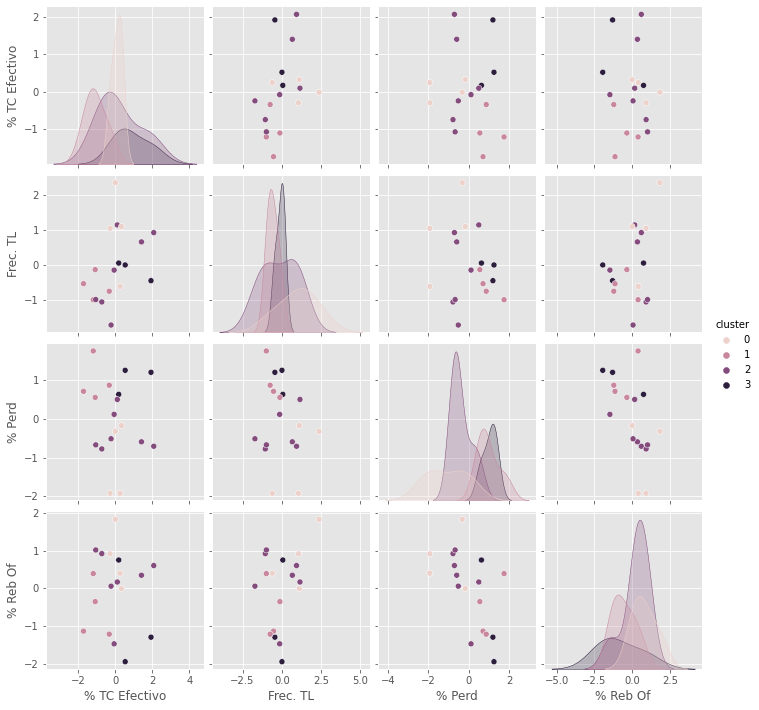

In [1380]:
# Visualizamos nuestros grupos en base a las variables que yo escoja
selected_columns = ["% TC Efectivo", "Frec. TL", "% Perd","% Reb Of" ]

# "bright", "colorblind", "pastel", "muted", "dark"
sns.set_palette("colorblind") 
sns.pairplot(df, vars = selected_columns, hue = 'cluster');

## Caracterización de los grupos de equipos creados

Una vez que tenemos hecha nuestra segmentación, vamos a crear una ficha resumen de cada grupo de equipos con las principales variables introducidas, o con aquellas que no se han utilizado en la segmentación para hacer un seguimiento periódico de los equipos.

---



In [1381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Equipo               18 non-null     object 
 1   Clasificación        18 non-null     int64  
 2   Victorias            18 non-null     int64  
 3   % TC Efectivo        18 non-null     float64
 4   Frec. TL             18 non-null     float64
 5   % Perd               18 non-null     float64
 6   % Reb Of             18 non-null     float64
 7   % TC Efectivo_rival  18 non-null     float64
 8   Frec. TL_rival       18 non-null     float64
 9   % Perd_rival         18 non-null     float64
 10  % Reb Of_rival       18 non-null     float64
 11  cluster              18 non-null     int32  
dtypes: float64(8), int32(1), int64(2), object(1)
memory usage: 1.7+ KB


In [1382]:
df["Equipo"]

0                REAL BETIS ENERGIA PLUS 
1                  RETABET BILBAO BASKET 
2                         IBEROJET PALMA 
3            LIBERBANK OVIEDO BALONCESTO 
4                CLUB MELILLA BALONCESTO 
5             CARRAMIMBRE CBC VALLADOLID 
6                        COVIRAN GRANADA 
7                     RIO OURENSE TERMAL 
8              CHOCOLATES TRAPA PALENCIA 
9                         LEVITEC HUESCA 
10                      ICG FORCA LLEIDA 
11                          LEYMA CORUNA 
12                          TAU CASTELLO 
13                   ZTE REAL CANOE N.C. 
14    CACERES PATRIMONIO DE LA HUMANIDAD 
15                             C.B. PRAT 
16                           BARCA LASSA 
17                 SAENZ HORECA ARABERRI 
Name: Equipo, dtype: object

In [1383]:
df.drop(["Clasificación", "Victorias"], axis =1, inplace = True)

In [1384]:
df.insert(loc = 1, column = 'Victorias', value= [30, 24, 22, 22, 21, 20, 20, 20, 19, 18, 16, 14, 13, 11, 11, 9, 9, 7])

In [1385]:
df.insert(loc = 1, column = 'Clasificación', value= [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18])

In [1386]:
df.head()

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster
0,REAL BETIS ENERGIA PLUS,1,30,2.070666,0.931829,-0.705635,0.605513,0.013093,-0.940986,0.458525,-0.116803,2
1,RETABET BILBAO BASKET,2,24,0.250686,-0.608822,-1.921544,0.402132,-0.868518,1.139089,1.592241,-1.394958,0
2,IBEROJET PALMA,3,22,1.405095,0.665883,-0.591917,0.348786,1.156570,-0.568365,0.694338,-1.374935,2
3,LIBERBANK OVIEDO BALONCESTO,4,22,1.920255,-0.443752,1.201330,-1.294934,-2.204029,0.238195,-2.062859,-0.090105,3
4,CLUB MELILLA BALONCESTO,5,21,0.175480,0.060627,0.632739,0.752214,-1.016908,-0.308945,-1.183096,-0.216919,3


In [1387]:
ficha_df = pd.DataFrame()
ficha_df

""


In [1388]:
for i, col in enumerate([ "% TC Efectivo", "Frec. TL", "% Perd","% Reb Of",
                         "% TC Efectivo_rival", "Frec. TL_rival", "% Perd_rival","% Reb Of_rival"]):
    resumen_data = df[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = ficha_df.append(resumen_data)

In [1389]:
resumen_data

cluster                     0         1         2         3
% Reb Of_rival mean -1.284830  1.373266 -0.061977  0.026698
               std   0.189508  0.560762  0.654520  0.318508
               min  -1.394958  0.667444 -1.374935 -0.216919
               25%  -1.382444  1.060402 -0.085099 -0.153512
               50%  -1.371598  1.456697 -0.036709 -0.090105
               75%  -1.273984  1.769561  0.183547  0.148506
               max  -1.001166  1.912228  0.780910  0.387118

In [1390]:
ficha_df

cluster                          0         1         2         3
% TC Efectivo       mean  0.069252 -1.089857  0.208786  0.873641
                    std   0.279586  0.573585  1.133506  0.923106
                    min  -0.290796 -1.727227 -1.065416  0.175480
                    25%  -0.079279 -1.332396 -0.488211  0.350334
                    50%   0.120956 -1.148142 -0.072699  0.525187
                    75%   0.269487 -0.905603  0.752685  1.222721
                    max   0.325892 -0.335919  2.070666  1.920255
Frec. TL            mean  0.978828 -0.598505 -0.163396 -0.125840
                    std   1.218891  0.365700  1.117209  0.276691
                    min  -0.608822 -0.989400 -1.713873 -0.443752
                    25%   0.639518 -0.807135 -1.019204 -0.219074
                    50%   1.080850 -0.638626 -0.141124  0.005604
                    75%   1.420161 -0.429997  0.798856  0.033116
                    max   2.362434 -0.127369  1.151922  0.060627
% Perd              mean -1.083967  0.971707 -0.376978  1.029295
                    std   0.969055  0.536122  0.488764  0.344428
                    min  -1.921544  0.554011 -0.775616  0.632739
                    25%  -1.921544  0.672103 -0.688140  0.917034
                    50%  -1.121144  0.790195 -0.591917  1.201330
                    75%  -0.283566  1.089798 -0.198278  1.227572
                    max  -0.172035  1.752425  0.501526  1.253815
% Reb Of            mean  0.786389 -0.577265  0.235902 -0.829269
                    std   0.792536  0.754608  0.835185  1.407654
                    min  -0.004631 -1.214915 -1.471642 -1.945087
                    25%   0.300441 -1.154901  0.113730 -1.620011
                    50%   0.658859 -0.743138  0.348786 -1.294934
                    75%   1.144806 -0.165502  0.763883 -0.271360
                    max   1.832468  0.392129  1.018943  0.752214
% TC Efectivo_rival mean -0.222585  0.627384  0.461381 -1.616288
                    std   0.633116  0.742304  0.746071  0.593646
                    min  -0.868518 -0.222585 -0.584831 -2.204029
                    25%  -0.583740  0.291325 -0.074195 -1.915977
                    50%  -0.320784  0.578285  0.606653 -1.627926
                    75%   0.040371  0.914345  0.923073 -1.322417
                    max   0.619747  1.575553  1.510087 -1.016908
Frec. TL_rival      mean  1.212198  0.283003 -0.986806  0.308945
                    std   0.443648  0.738068  0.518552  0.656133
                    min   0.695717 -0.516481 -2.054133 -0.308945
                    25%   1.028246 -0.229940 -1.051829 -0.035375
                    50%   1.188614  0.278287 -0.940986  0.238195
                    75%   1.372566  0.791230 -0.620249  0.617891
                    max   1.775846  1.091921 -0.568365  0.997587
% Perd_rival        mean -0.038042  0.841721  0.084075 -1.267747
                    std   1.103389  0.876387  0.728985  0.756349
                    min  -0.720540 -0.430308 -1.246584 -2.062859
                    25%  -0.713737  0.692071 -0.194495 -1.622978
                    50%  -0.511936  1.111546  0.132015 -1.183096
                    75%   0.163759  1.261196  0.576432 -0.870190
                    max   1.592241  1.574102  0.939221 -0.557284
% Reb Of_rival      mean -1.284830  1.373266 -0.061977  0.026698
                    std   0.189508  0.560762  0.654520  0.318508
                    min  -1.394958  0.667444 -1.374935 -0.216919
                    25%  -1.382444  1.060402 -0.085099 -0.153512
                    50%  -1.371598  1.456697 -0.036709 -0.090105
                    75%  -1.273984  1.769561  0.183547  0.148506
                    max  -1.001166  1.912228  0.780910  0.387118

In [1391]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

Sacar los equipos por cluster


In [1392]:
df.head(1)

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster
0,REAL BETIS ENERGIA PLUS,1,30,2.070666,0.931829,-0.705635,0.605513,0.013093,-0.940986,0.458525,-0.116803,2


In [1393]:
df['cluster'].value_counts()

2    7
0    4
1    4
3    3
Name: cluster, dtype: int64

In [1394]:
df.sort_values("Victorias", ascending = False)[['Equipo', "Victorias"]]

,Equipo,Victorias
0,REAL BETIS ENERGIA PLUS,30
1,RETABET BILBAO BASKET,24
2,IBEROJET PALMA,22
3,LIBERBANK OVIEDO BALONCESTO,22
4,CLUB MELILLA BALONCESTO,21
5,CARRAMIMBRE CBC VALLADOLID,20
6,COVIRAN GRANADA,20
7,RIO OURENSE TERMAL,20
8,CHOCOLATES TRAPA PALENCIA,19
9,LEVITEC HUESCA,18


Grupo 1

In [1395]:
df[df['cluster'] == 0]

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster
1,RETABET BILBAO BASKET,2,24,0.250686,-0.608822,-1.921544,0.402132,-0.868518,1.139089,1.592241,-1.394958,0
5,CARRAMIMBRE CBC VALLADOLID,6,20,-0.290796,1.055631,-1.921544,0.915586,-0.152754,1.775846,-0.720540,-1.364923,0
6,COVIRAN GRANADA,7,20,-0.008774,2.362434,-0.320743,1.832468,-0.488814,1.238140,-0.312402,-1.378272,0
8,CHOCOLATES TRAPA PALENCIA,9,19,0.325892,1.106069,-0.172035,-0.004631,0.619747,0.695717,-0.711470,-1.001166,0


In [1396]:
Cluster1= df[df['cluster'] == 0][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

In [1397]:
Cluster1

,Equipo,Clasificación,Victorias
1,RETABET BILBAO BASKET,2,24
5,CARRAMIMBRE CBC VALLADOLID,6,20
6,COVIRAN GRANADA,7,20
8,CHOCOLATES TRAPA PALENCIA,9,19


In [1398]:
Equipos_propio_rival.columns

Index(['% TC Efectivo', 'Frec. TL', '% Perd', '% Reb Of',
       '% TC Efectivo_rival', 'Frec. TL_rival', '% Perd_rival',
       '% Reb Of_rival'],
      dtype='object')

In [1399]:
#Añadirle los valores originales para comparar dentro de cada cluster. Merge on left
Cluster1 = Cluster1.join(Equipos_propio_rival, how = "left", on = "Equipo", rsuffix = " ")

In [1400]:
Cluster1.columns

Index(['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival'],
      dtype='object')

In [1401]:
#Ver los 8 factores de Oliver
Cluster1 = Cluster1 [['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival']]

In [1402]:
Cluster1

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
1,RETABET BILBAO BASKET,2,24,50.88,16.85,13.02,29.57,48.19,20.58,16.97,24.20
5,CARRAMIMBRE CBC VALLADOLID,6,20,49.44,20.48,13.02,31.11,49.83,21.93,14.42,24.29
6,COVIRAN GRANADA,7,20,50.19,23.33,14.85,33.86,49.06,20.79,14.87,24.25
8,CHOCOLATES TRAPA PALENCIA,9,19,51.08,20.59,15.02,28.35,51.60,19.64,14.43,25.38


In [1403]:
df.columns

Index(['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival', 'cluster'],
      dtype='object')

In [1404]:
# Histograma '% Perd'
#Equipos_propio = Equipos_propio.sort_values("Victorias", ascending = False)
plt.figure(figsize = (15,5))
px.histogram(df, x = "% Perd", y = "% Perd_rival", 
             color = "cluster", 
             title = "Pérdidas por cluster",
             width = 1100, height = 650) #, log_y = True)

<Figure size 1080x360 with 0 Axes>

In [1405]:
# Histograma % TC Efectivo
#Equipos_propio = Equipos_propio.sort_values("Victorias", ascending = False)
plt.figure(figsize = (15,5))
px.histogram(df, x = "Equipo", y = "% TC Efectivo", 
             color = "cluster", 
             title = "%TC efectivo por clusters", 
             width = 1200, height = 650 #, log_y = True
             )

<Figure size 1080x360 with 0 Axes>

In [1406]:
# Histograma % Reb Of
#Equipos_propio = Equipos_propio.sort_values("Victorias", ascending = False)
plt.figure(figsize = (15,5))
px.histogram(df, x = "% TC Efectivo", y = "% Reb Of", 
             color = "cluster", 
             title = "% Reb Of por número de victorias", 
             hover_name = "Equipo",
             width = 1200, height = 650 #, log_y = True
             )

<Figure size 1080x360 with 0 Axes>

In [1407]:
# Gráficos de dispersión
px.scatter(df, x = "% TC Efectivo", y = "Victorias", color = "cluster", #size = "Frec. TL", 
           hover_name = "cluster")

Grupo 2

In [1408]:
df[df['cluster'] == 1]['Equipo']

13                   ZTE REAL CANOE N.C. 
14    CACERES PATRIMONIO DE LA HUMANIDAD 
15                             C.B. PRAT 
16                           BARCA LASSA 
Name: Equipo, dtype: object

In [1409]:
df[df['cluster'] == 1]

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster
13,ZTE REAL CANOE N.C.,14,11,-1.727227,-0.530873,0.711467,-1.134896,0.693942,-0.134427,1.156894,0.667444,1
14,CACERES PATRIMONIO DE LA HUMANIDAD,15,11,-0.335919,-0.746380,0.868923,-1.214915,0.462628,-0.516481,-0.430308,1.722006,1
15,C.B. PRAT,16,9,-1.095498,-0.127369,0.554011,-0.351379,1.575553,1.091921,1.066197,1.912228,1
16,BARCA LASSA,17,9,-1.200786,-0.989400,1.752425,0.392129,-0.222585,0.691000,1.574102,1.191388,1


In [1410]:
Cluster2 = df[df['cluster'] == 1][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

In [1411]:
Cluster2

,Equipo,Clasificación,Victorias
13,ZTE REAL CANOE N.C.,14,11
14,CACERES PATRIMONIO DE LA HUMANIDAD,15,11
15,C.B. PRAT,16,9
16,BARCA LASSA,17,9


In [1412]:
Equipos_propio_rival.columns

Index(['% TC Efectivo', 'Frec. TL', '% Perd', '% Reb Of',
       '% TC Efectivo_rival', 'Frec. TL_rival', '% Perd_rival',
       '% Reb Of_rival'],
      dtype='object')

In [1413]:
#Añadirle los valores originales para comparar dentro de cada cluster. Merge on left
Cluster2 = Cluster2.join(Equipos_propio_rival, how = "left", on = "Equipo", rsuffix = " ")

In [1414]:
Cluster2.columns

Index(['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival'],
      dtype='object')

In [1415]:
#Ver los 8 factores de Oliver
Cluster2 = Cluster2 [['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival']]

In [1416]:
Cluster2

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
13,ZTE REAL CANOE N.C.,14,11,45.62,17.02,16.03,24.96,51.77,17.88,16.49,30.38
14,CACERES PATRIMONIO DE LA HUMANIDAD,15,11,49.32,16.55,16.21,24.72,51.24,17.07,14.74,33.54
15,C.B. PRAT,16,9,47.30,17.90,15.85,27.31,53.79,20.48,16.39,34.11
16,BARCA LASSA,17,9,47.02,16.02,17.22,29.54,49.67,19.63,16.95,31.95


Grupo 3

In [1417]:
df[df['cluster'] == 2]['Equipo']

0     REAL BETIS ENERGIA PLUS 
2              IBEROJET PALMA 
7          RIO OURENSE TERMAL 
10           ICG FORCA LLEIDA 
11               LEYMA CORUNA 
12               TAU CASTELLO 
17      SAENZ HORECA ARABERRI 
Name: Equipo, dtype: object

In [1418]:
df[df['cluster'] == 2]

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster
0,REAL BETIS ENERGIA PLUS,1,30,2.070666,0.931829,-0.705635,0.605513,0.013093,-0.940986,0.458525,-0.116803,2
2,IBEROJET PALMA,3,22,1.405095,0.665883,-0.591917,0.348786,1.156570,-0.568365,0.694338,-1.374935,2
7,RIO OURENSE TERMAL,8,20,0.100274,1.151922,0.501526,0.168743,-0.161483,-2.054133,0.939221,-0.036709,2
10,ICG FORCA LLEIDA,11,16,-0.738270,-1.053594,-0.775616,0.922254,-0.584831,-0.643833,-0.285193,0.260303,2
11,LEYMA CORUNA,12,14,-0.238152,-1.713873,-0.513189,0.058718,0.689577,-0.596665,0.132015,-0.053396,2
12,TAU CASTELLO,13,13,-0.072699,-0.141124,0.116634,-1.471642,0.606653,-1.148522,-0.103798,0.780910,2
17,SAENZ HORECA ARABERRI,18,7,-1.065416,-0.984815,-0.670645,1.018943,1.510087,-0.955136,-1.246584,0.106791,2


In [1419]:
Cluster3 = df[df['cluster'] == 2][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

In [1420]:
Cluster3

,Equipo,Clasificación,Victorias
0,REAL BETIS ENERGIA PLUS,1,30
2,IBEROJET PALMA,3,22
7,RIO OURENSE TERMAL,8,20
10,ICG FORCA LLEIDA,11,16
11,LEYMA CORUNA,12,14
12,TAU CASTELLO,13,13
17,SAENZ HORECA ARABERRI,18,7


In [1421]:
Equipos_propio_rival.columns

Index(['% TC Efectivo', 'Frec. TL', '% Perd', '% Reb Of',
       '% TC Efectivo_rival', 'Frec. TL_rival', '% Perd_rival',
       '% Reb Of_rival'],
      dtype='object')

In [1422]:
#Añadirle los valores originales para comparar dentro de cada cluster. Merge on left
Cluster3 = Cluster3.join(Equipos_propio_rival, how = "left", on = "Equipo", rsuffix = " ")

In [1423]:
Cluster3.columns

Index(['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival'],
      dtype='object')

In [1424]:
#Ver los 8 factores de Oliver
Cluster3 = Cluster3 [['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival']]

In [1425]:
Cluster3

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
0,REAL BETIS ENERGIA PLUS,1,30,55.72,20.21,14.41,30.18,50.21,16.17,15.72,28.03
2,IBEROJET PALMA,3,22,53.95,19.63,14.54,29.41,52.83,16.96,15.98,24.26
7,RIO OURENSE TERMAL,8,20,50.48,20.69,15.79,28.87,49.81,13.81,16.25,28.27
10,ICG FORCA LLEIDA,11,16,48.25,15.88,14.33,31.13,48.84,16.80,14.90,29.16
11,LEYMA CORUNA,12,14,49.58,14.44,14.63,28.54,51.76,16.90,15.36,28.22
12,TAU CASTELLO,13,13,50.02,17.87,15.35,23.95,51.57,15.73,15.10,30.72
17,SAENZ HORECA ARABERRI,18,7,47.38,16.03,14.45,31.42,53.64,16.14,13.84,28.70


Grupo 4

In [1426]:
df[df['cluster'] == 3]['Equipo']

3    LIBERBANK OVIEDO BALONCESTO 
4        CLUB MELILLA BALONCESTO 
9                 LEVITEC HUESCA 
Name: Equipo, dtype: object

In [1427]:
df[df['cluster'] == 3]

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster
3,LIBERBANK OVIEDO BALONCESTO,4,22,1.920255,-0.443752,1.201330,-1.294934,-2.204029,0.238195,-2.062859,-0.090105,3
4,CLUB MELILLA BALONCESTO,5,21,0.175480,0.060627,0.632739,0.752214,-1.016908,-0.308945,-1.183096,-0.216919,3
9,LEVITEC HUESCA,10,18,0.525187,0.005604,1.253815,-1.945087,-1.627926,0.997587,-0.557284,0.387118,3


In [1428]:
Cluster4 = df[df['cluster'] == 3][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

In [1429]:
Cluster4 

,Equipo,Clasificación,Victorias
3,LIBERBANK OVIEDO BALONCESTO,4,22
4,CLUB MELILLA BALONCESTO,5,21
9,LEVITEC HUESCA,10,18


In [1430]:
Equipos_propio_rival.columns

Index(['% TC Efectivo', 'Frec. TL', '% Perd', '% Reb Of',
       '% TC Efectivo_rival', 'Frec. TL_rival', '% Perd_rival',
       '% Reb Of_rival'],
      dtype='object')

In [1431]:
#Añadirle los valores originales para comparar dentro de cada cluster. Merge on left
Cluster4  = Cluster4 .join(Equipos_propio_rival, how = "left", on = "Equipo", rsuffix = " ")

In [1432]:
Cluster4 .columns

Index(['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival'],
      dtype='object')

In [1433]:
#Ver los 8 factores de Oliver
Cluster4  = Cluster4  [['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival']]

In [1434]:
Cluster4 

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
3,LIBERBANK OVIEDO BALONCESTO,4,22,55.32,17.21,16.59,24.48,45.13,18.67,12.94,28.11
4,CLUB MELILLA BALONCESTO,5,21,50.68,18.31,15.94,30.62,47.85,17.51,13.91,27.73
9,LEVITEC HUESCA,10,18,51.61,18.19,16.65,22.53,46.45,20.28,14.60,29.54


Grupo 5

In [1435]:
df[df['cluster'] == 4]['Equipo']

Series([], Name: Equipo, dtype: object)

In [1436]:
df[df['cluster'] == 4]

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster


In [1437]:
Cluster5 = df[df['cluster'] == 4][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

In [1438]:
Cluster5

,Equipo,Clasificación,Victorias


In [1439]:
Equipos_propio_rival.columns

Index(['% TC Efectivo', 'Frec. TL', '% Perd', '% Reb Of',
       '% TC Efectivo_rival', 'Frec. TL_rival', '% Perd_rival',
       '% Reb Of_rival'],
      dtype='object')

In [1440]:
#Añadirle los valores originales para comparar dentro de cada cluster. Merge on left
Cluster5 = Cluster5 .join(Equipos_propio_rival, how = "left", on = "Equipo", rsuffix = " ")

In [1441]:
Cluster5 .columns

Index(['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival'],
      dtype='object')

In [1442]:
#Ver los 8 factores de Oliver
Cluster5  = Cluster5  [['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival']]

In [1443]:
Cluster5

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival


Grupo 6

In [1444]:
df[df['cluster'] == 5]['Equipo']

Series([], Name: Equipo, dtype: object)

In [1445]:
df[df['cluster'] == 5]

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival,cluster


In [1446]:
Cluster6 = df[df['cluster'] == 5][['Equipo', "Clasificación", "Victorias"]].sort_values("Clasificación", ascending = True)

In [1447]:
Cluster6 

,Equipo,Clasificación,Victorias


In [1448]:
Equipos_propio_rival.columns

Index(['% TC Efectivo', 'Frec. TL', '% Perd', '% Reb Of',
       '% TC Efectivo_rival', 'Frec. TL_rival', '% Perd_rival',
       '% Reb Of_rival'],
      dtype='object')

In [1449]:
#Añadirle los valores originales para comparar dentro de cada cluster. Merge on left
Cluster6  = Cluster6  .join(Equipos_propio_rival, how = "left", on = "Equipo", rsuffix = " ")

In [1450]:
Cluster6  .columns

Index(['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival'],
      dtype='object')

In [1451]:
#Ver los 8 factores de Oliver
Cluster6  = Cluster6   [['Equipo', 'Clasificación', 'Victorias', '% TC Efectivo', 'Frec. TL',
       '% Perd', '% Reb Of', '% TC Efectivo_rival', 'Frec. TL_rival',
       '% Perd_rival', '% Reb Of_rival']]

In [1452]:
Cluster6 

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival


In [1453]:
Cluster1

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
1,RETABET BILBAO BASKET,2,24,50.88,16.85,13.02,29.57,48.19,20.58,16.97,24.20
5,CARRAMIMBRE CBC VALLADOLID,6,20,49.44,20.48,13.02,31.11,49.83,21.93,14.42,24.29
6,COVIRAN GRANADA,7,20,50.19,23.33,14.85,33.86,49.06,20.79,14.87,24.25
8,CHOCOLATES TRAPA PALENCIA,9,19,51.08,20.59,15.02,28.35,51.60,19.64,14.43,25.38


In [1454]:
Cluster2

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
13,ZTE REAL CANOE N.C.,14,11,45.62,17.02,16.03,24.96,51.77,17.88,16.49,30.38
14,CACERES PATRIMONIO DE LA HUMANIDAD,15,11,49.32,16.55,16.21,24.72,51.24,17.07,14.74,33.54
15,C.B. PRAT,16,9,47.30,17.90,15.85,27.31,53.79,20.48,16.39,34.11
16,BARCA LASSA,17,9,47.02,16.02,17.22,29.54,49.67,19.63,16.95,31.95


In [1455]:
Cluster3

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
0,REAL BETIS ENERGIA PLUS,1,30,55.72,20.21,14.41,30.18,50.21,16.17,15.72,28.03
2,IBEROJET PALMA,3,22,53.95,19.63,14.54,29.41,52.83,16.96,15.98,24.26
7,RIO OURENSE TERMAL,8,20,50.48,20.69,15.79,28.87,49.81,13.81,16.25,28.27
10,ICG FORCA LLEIDA,11,16,48.25,15.88,14.33,31.13,48.84,16.80,14.90,29.16
11,LEYMA CORUNA,12,14,49.58,14.44,14.63,28.54,51.76,16.90,15.36,28.22
12,TAU CASTELLO,13,13,50.02,17.87,15.35,23.95,51.57,15.73,15.10,30.72
17,SAENZ HORECA ARABERRI,18,7,47.38,16.03,14.45,31.42,53.64,16.14,13.84,28.70


In [1456]:
Cluster4

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
3,LIBERBANK OVIEDO BALONCESTO,4,22,55.32,17.21,16.59,24.48,45.13,18.67,12.94,28.11
4,CLUB MELILLA BALONCESTO,5,21,50.68,18.31,15.94,30.62,47.85,17.51,13.91,27.73
9,LEVITEC HUESCA,10,18,51.61,18.19,16.65,22.53,46.45,20.28,14.60,29.54


In [1457]:
Cluster5

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival


In [1458]:
Cluster6

,Equipo,Clasificación,Victorias,% TC Efectivo,Frec. TL,% Perd,% Reb Of,% TC Efectivo_rival,Frec. TL_rival,% Perd_rival,% Reb Of_rival
